In [1]:
# define libraries to use
import pandas as pd
import numpy as np
#from pathlib import Path
import requests,json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy as sp
%matplotlib inline
import pickle
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = 50

def millions(x,pos=0):
    if x==0:
        return '0'
    else:
        return '%1.1fM' % (float(x) * 1e-6)


In [2]:
nydmvVinDecodeDf = pd.read_pickle("tmp/nydmv-vindecodedf.pkl")
nydmvVinDecodeDf.set_index("entry",inplace=True)
nydmvDf = pd.read_pickle("tmp/nydmvdf.pkl")
nydmvVinDecodeDf = pd.merge(nydmvDf,nydmvVinDecodeDf,left_index=True, right_index=True)
nydmvDf = None
nydmvVinDecodeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11180719 entries, 33 to 12586465
Data columns (total 54 columns):
 #   Column                            Non-Null Count     Dtype         
---  ------                            --------------     -----         
 0   VIN                               11180719 non-null  object        
 1   Registration Class                11180719 non-null  category      
 2   City                              11180719 non-null  object        
 3   State                             11180719 non-null  category      
 4   Zip                               11180719 non-null  category      
 5   County                            11180719 non-null  object        
 6   Model Year                        11180719 non-null  Int64         
 7   Make                              11180719 non-null  category      
 8   Body Type                         11180719 non-null  category      
 9   Fuel Type                         11180719 non-null  category      
 10  Unl

In [3]:
farsVehVpicMergeDf = pd.read_pickle("tmp/fars-vehvpicmergedf.pkl")
farsAccidentDf = pd.read_pickle("tmp/fars-accidentdf.pkl")
# add STATE to farsVehVpicMergeDf
farsVehVpicMergeDf = pd.merge(farsVehVpicMergeDf,farsAccidentDf[["ST_CASE","STATE"]],on="ST_CASE")
farsVehVpicMergeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51435 entries, 0 to 51434
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ST_CASE                           51435 non-null  int64  
 1   VEH_NO                            51435 non-null  int64  
 2   NUMOCCS                           51435 non-null  int64  
 3   MAKE                              51435 non-null  int64  
 4   MAK_MOD                           51435 non-null  int64  
 5   BODY_TYP                          51435 non-null  int64  
 6   MOD_YEAR                          51435 non-null  int64  
 7   VIN                               51435 non-null  object 
 8   TOW_VEH                           51435 non-null  int64  
 9   TRAV_SP                           51435 non-null  int64  
 10  ROLLOVER                          51435 non-null  int64  
 11  IMPACT1                           51435 non-null  int64  
 12  M_HA

In [4]:
farsPersonDf = pd.read_pickle("tmp/fars-persondf.pkl")
# keep drivers only
#farsPersonDf.info(show_counts=True)
farsPersonDf = farsPersonDf[farsPersonDf["PER_NO"]==1][["ST_CASE","VEH_NO","SEX","AGE"]]
farsPersonDf["SEX"] = farsPersonDf["SEX"].astype("int64")
farsPersonDf["AGE"] = farsPersonDf["AGE"].astype("int64")
farsPersonDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61911 entries, 0 to 85883
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ST_CASE  61911 non-null  int64
 1   VEH_NO   61911 non-null  int64
 2   SEX      61911 non-null  int64
 3   AGE      61911 non-null  int64
dtypes: int64(4)
memory usage: 2.4 MB


In [5]:
# top 20 vehicle models involved in crashes
farsTopModels = pd.read_pickle("tmp/fars-topmodels.pkl")
farsTopModels.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ModelId  20 non-null     int64
dtypes: int64(1)
memory usage: 288.0 bytes


In [6]:
f = open("tmp/fars-categories.pkl","rb")
farsCategories = pickle.load(f)
f.close()

In [7]:
farsCategories.keys()

dict_keys(['STATE', 'MONTH', 'DAY_WEEK', 'ROUTE', 'RUR_URB', 'FUNC_SYS', 'HARM_EV', 'MAN_COLL', 'LGT_COND', 'WEATHER', 'NUMOCCS', 'MAKE', 'MAK_MOD', 'BODY_TYP', 'TOW_VEH', 'TRAV_SP', 'ROLLOVER', 'IMPACT1', 'M_HARM', 'DR_PRES', 'L_STATUS', 'L_TYPE', 'PREV_ACC', 'PREV_DWI', 'PREV_SPD', 'PREV_OTH', 'SPEEDREL', 'VSURCOND', 'P_CRASH2', 'ACC_TYPE', 'DR_DRINK', 'VPICMAKE', 'VPICMODEL', 'VPICBODYCLASS', 'GVWR_FROM', 'GVWR_TO', 'SEX', 'PER_TYP', 'INJ_SEV', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'EJECTION', 'LOCATION', 'PNUMOCCS', 'PTYPE', 'PMAKE', 'PMAK_MOD', 'PTRAILER', 'PM_HARM', 'PBPTYPE', 'PBAGE', 'PBSEX', 'AOI1', 'AOI2', 'CRASHRF', 'DRIVERRF', 'DRDISTRACT', 'DRIMPAIR', 'VEHICLECC', 'VISION', 'NMCC', 'VehicleTypeId', 'ManufacturerFullNameId', 'MakeId', 'ModelId', 'BodyClassId', 'GrossVehicleWeightRatingFromId', 'GrossVehicleWeightRatingToId', 'ForwardCollisionWarningId', 'DynamicBrakeSupportId', 'CrashImminentBrakingID', 'PedestrianAutoEmergencyBrakingId', 'BlindSpotWarningId', 'BlindSpotInterv

In [8]:
farsCategories["GVWR_FROM"]

{11: 'Class 1: 6,000 lbs. or less (2,722 kg or less)',
 12: 'Class 2: 6,001 - 10,000 lbs. (2,722 - 4,536 kg)',
 18: 'Class 8: 33,001 lbs. and above (14,969 kg and above)',
 15: 'Class 5: 16,001 - 19,500 lbs. (7,258 - 8,845 kg)',
 17: 'Class 7: 26,001 - 33,000 lbs. (11,794 - 14,969 kg)',
 13: 'Class 3: 10,001 - 14,000 lbs. (4,536 - 6,350 kg)',
 99: 'Reported as Unknown',
 16: 'Class 6: 19,501 - 26,000 lbs. (8,845 - 11,794 kg)',
 14: 'Class 4: 14,001 - 16,000 lbs. (6,350 - 7,258 kg)',
 98: 'Not Reported'}

In [9]:
farsCategories["GrossVehicleWeightRatingFromId"]

{nan: nan,
 14.0: 'Class 2E: 6,001 - 7,000 lb (2,722 - 3,175 kg)',
 9.0: 'Class 8: 33,001 lb and above (14,969 kg and above)',
 15.0: 'Class 2F: 7,001 - 8,000 lb (3,175 - 3,629 kg)',
 13.0: 'Class 1D: 5,001 - 6,000 lb (2,268 - 2,722 kg)',
 11.0: 'Class 1B: 3,001 - 4,000 lb (1,360 - 1,814 kg)',
 6.0: 'Class 5: 16,001 - 19,500 lb (7,258 - 8,845 kg)',
 17.0: 'Class 2H: 9,001 - 10,000 lb (4,082 - 4,536 kg)',
 12.0: 'Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)',
 8.0: 'Class 7: 26,001 - 33,000 lb (11,794 - 14,969 kg)',
 16.0: 'Class 2G: 8,001 - 9,000 lb (3,629 - 4,082 kg)',
 10.0: 'Class 1A: 3,000 lb or less (1,360 kg or less)',
 4.0: 'Class 3: 10,001 - 14,000 lb (4,536 - 6,350 kg)',
 1.0: 'Class 1: 6,000 lb or less (2,722 kg or less)',
 7.0: 'Class 6: 19,501 - 26,000 lb (8,845 - 11,794 kg)',
 2.0: 'Class 2: 6,001 - 10,000 lb (2,722 - 4,536 kg)',
 5.0: 'Class 4: 14,001 - 16,000 lb (6,350 - 7,258 kg)'}

## Eliminate Motorcycles, Buses, Off-Road Vehicles, Low-Speed Vehicles, Others

In [10]:
vpicBodyToRemove = [
    16, 68, 73, # Buses
    6, 12, 80, 81, 82, 83, 85, 87, 90, 94, 98, 100, 103, 104, 109, 110, 114, 125, 996, # Motorcycles
    69, 84, 86, 88, 97, 105, 113, 124, 126, 127, # off-road vehicles
    4, # low-speed vehiches
    108, 117, # Other
    61, # Trailers
    62, 63, 64, 65, 67, 70, 71, 72, 74, 75, 76, 77, 78, 107, 112, # Incomplete Body class (unfinished)
]

In [11]:
farsVehVpicMergeDf = farsVehVpicMergeDf[~farsVehVpicMergeDf["VPICBODYCLASS"].isin(vpicBodyToRemove)]
farsVehVpicMergeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44922 entries, 0 to 51434
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ST_CASE                           44922 non-null  int64  
 1   VEH_NO                            44922 non-null  int64  
 2   NUMOCCS                           44922 non-null  int64  
 3   MAKE                              44922 non-null  int64  
 4   MAK_MOD                           44922 non-null  int64  
 5   BODY_TYP                          44922 non-null  int64  
 6   MOD_YEAR                          44922 non-null  int64  
 7   VIN                               44922 non-null  object 
 8   TOW_VEH                           44922 non-null  int64  
 9   TRAV_SP                           44922 non-null  int64  
 10  ROLLOVER                          44922 non-null  int64  
 11  IMPACT1                           44922 non-null  int64  
 12  M_HA

In [12]:
nydmvVinDecodeDf
nydmvVinDecodeDf = nydmvVinDecodeDf[~nydmvVinDecodeDf["BodyClassId"].isin(vpicBodyToRemove)]
nydmvVinDecodeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10533510 entries, 33 to 12586465
Data columns (total 54 columns):
 #   Column                            Non-Null Count     Dtype         
---  ------                            --------------     -----         
 0   VIN                               10533510 non-null  object        
 1   Registration Class                10533510 non-null  category      
 2   City                              10533510 non-null  object        
 3   State                             10533510 non-null  category      
 4   Zip                               10533510 non-null  category      
 5   County                            10533510 non-null  object        
 6   Model Year                        10533510 non-null  Int64         
 7   Make                              10533510 non-null  category      
 8   Body Type                         10533510 non-null  category      
 9   Fuel Type                         10533510 non-null  category      
 10  Unl

Next steps:
1) FARS vpicdecode, see if GVWR_FROM can be infered from Model/Year/Trim/Series... from NYSDMV values
2) get vehicle grouping finalized

## FARS vpicdecode, see if GVWR_FROM can be infered from Model/Year/Trim/Series... from NYSDMV values

In [13]:
# check if model numbers are unique across makes
tmp1 = nydmvVinDecodeDf[["MakeID","ModelID"]].dropna().drop_duplicates()
if (tmp1["ModelID"].value_counts() > 1).sum() == 0:
    print("VPIC ModelIDs are Unique Across Manufacturers")
else:
    print("***************************************************************************")
    print("VPIC ModelIDs are NOT Unique Across Manufacturers!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("***************************************************************************")


VPIC ModelIDs are Unique Across Manufacturers


In [14]:
# check how many vehicles have missing GVWR_FROM in all states
farsVehNATMissingGVWRCnt = farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna().sum()
farsVehNYSMissingGVWRCnt = (farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna() & (farsVehVpicMergeDf["STATE"] == 36)).sum()
print("FARS Vehicles missing GVWR (NAT): ", farsVehNATMissingGVWRCnt)
print("FARS Vehicles missing GVWR (NYS): ", farsVehNYSMissingGVWRCnt)
print("FARS Cases with Vehicles missing GVWR (NAT): ", farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()][["ST_CASE"]].drop_duplicates().count().values[0])

FARS Vehicles missing GVWR (NAT):  15987
FARS Vehicles missing GVWR (NYS):  398
FARS Cases with Vehicles missing GVWR (NAT):  14123


In [15]:
# check how many vehicles have missing GVWR_FROM in NY state
print("FARS NYS Vehicles missing GVWR:",farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna() & (farsVehVpicMergeDf["STATE"] == 36)][["STATE"]].value_counts().values[0])
print("FARS NYS Cases with Vehicles missing GVWR: ",farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna() & (farsVehVpicMergeDf["STATE"] == 36)][["ST_CASE"]].drop_duplicates().count().values[0])

FARS NYS Vehicles missing GVWR: 398
FARS NYS Cases with Vehicles missing GVWR:  353


In [16]:
print("FARS Models missing GVWR\n",farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()][["VPICMODEL"]].value_counts().sort_values(ascending=False))
print("FARS Total Models missing GVWR = ",farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()][["VPICMODEL"]].drop_duplicates().count().values[0])

FARS Models missing GVWR
 VPICMODEL
2469         1013
2208          734
1904          697
1833          575
1834          548
             ... 
14216           1
14185           1
23521           1
20813           1
28077           1
Length: 459, dtype: int64
FARS Total Models missing GVWR =  459


In [17]:
print("NYSDMV Model IDs found:\n",nydmvVinDecodeDf[~nydmvVinDecodeDf["GrossVehicleWeightRatingFromId"].isna()][["ModelID"]].value_counts().sort_values(ascending=False))

NYSDMV Model IDs found:
 ModelID
1865.0     317135
1850.0     267276
2217.0     252979
1861.0     249779
1863.0     221239
            ...  
2248.0          1
9497            1
2560.0          1
2616.0          1
5908            1
Length: 1675, dtype: int64


In [18]:
# fars Vehicles with no weight
#farsModelsNoWeight = farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()][["VPICMODEL","VPICBODYCLASS"]].drop_duplicates().dropna()
farsModelsNoWeight = farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()][["VPICMODEL","Trim"]].drop_duplicates().dropna()
farsModelsNoWeight

,VPICMODEL,Trim
0,2475,300
124,1895,Police
137,2735,SE Base
166,2208,L/LE/SE/XLE/XSE
188,2053,200C
...,...,...
50249,6093,L
50400,2232,Premium + M/R + CWP
50449,6495,H Series
50468,14553,Royale Brougham


In [19]:
# nydmv models that have 1:1 mapping to GVWRF
# NOTE: after trial/error trim/series do not help in comin up with 1:1 mappings 
#
#tmp1 = nydmvVinDecodeDf[~nydmvVinDecodeDf["GrossVehicleWeightRatingFromId"].isna()][["ModelID","Trim","GrossVehicleWeightRatingFromId"]].drop_duplicates()[["ModelID","Trim"]].value_counts()
#tmp1 = nydmvVinDecodeDf[~nydmvVinDecodeDf["GrossVehicleWeightRatingFromId"].isna()][["MakeID","ModelID","BodyClassId","GrossVehicleWeightRatingFromId"]].drop_duplicates()
tmp1 = nydmvVinDecodeDf[~nydmvVinDecodeDf["GrossVehicleWeightRatingFromId"].isna()][["MakeID","ModelID","BodyClassId","GrossVehicleWeightRatingFromId"]].drop_duplicates().dropna()[["ModelID","BodyClassId","GrossVehicleWeightRatingFromId"]]
tmp1["ModelID"] = tmp1["ModelID"].astype("int64")
tmp1["BodyClassId"] = tmp1["BodyClassId"].astype("int64")
tmp1["GrossVehicleWeightRatingFromId"] = tmp1["GrossVehicleWeightRatingFromId"].astype("int64")
tmp2 = tmp1[["ModelID","BodyClassId"]].value_counts()
#tmp1["Trim"] = tmp1["Trim"].fillna("")
#print(tmp1[tmp1["ModelID"]==1938])
#tmp1[["MakeID","ModelID","BodyClassId","Trim"]].value_counts()
#tmp1[["MakeID","ModelID","BodyClassId"]].value_counts()
#tmp1.index[tmp1 == 1].astype("int64")
tmp3 = tmp1.set_index(["ModelID","BodyClassId"])
nydmvModelWeight = tmp3.loc[tmp2.index[tmp2 == 1]]
nydmvModelWeight

,,GrossVehicleWeightRatingFromId
ModelID,BodyClassId,
30717,11,9
30265,7,15
27558,7,12
14041,11,7
27591,7,14
...,...,...
5351,2,12
5361,66,8
5459,11,8


In [20]:
#farsVehVpicMergeDf["set_VPICMODEL_GVWR"] = farsVehVpicMergeDf[["VPICMODEL","GrossVehicleWeightRatingFromId"]].apply(tuple,axis=1)
farsVehVpicMergeDf["set_VPICMODEL_BODYCLASS"] = farsVehVpicMergeDf[["VPICMODEL","VPICBODYCLASS"]].apply(lambda row: (np.int64(row["VPICMODEL"]) if ~np.isnan(row["VPICMODEL"]) else np.nan, np.int64(row["VPICBODYCLASS"]) if ~np.isnan(row["VPICBODYCLASS"]) else np.nan),axis=1)
farsVehNATCanBefixedIdx = farsVehVpicMergeDf[farsVehVpicMergeDf["set_VPICMODEL_BODYCLASS"].isin(set(nydmvModelWeight.index)) & farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()].index
farsVehNYSCanBefixedIdx = farsVehVpicMergeDf[farsVehVpicMergeDf["set_VPICMODEL_BODYCLASS"].isin(set(nydmvModelWeight.index)) & farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna() & (farsVehVpicMergeDf["STATE"]==36)].index
farsVehNATCanBefixedCnt = len(farsVehNATCanBefixedIdx)
farsVehNYSCanBefixedCnt = len(farsVehNYSCanBefixedIdx)

print("NAT: GVWR Can be inputed for",farsVehNATCanBefixedCnt,"vehicles our of",farsVehNATMissingGVWRCnt,"(",farsVehNATCanBefixedCnt/farsVehNATMissingGVWRCnt*100,"%)")
print("NYS: GVWR Can be inputed for",farsVehNYSCanBefixedCnt,"vehicles our of",farsVehNYSMissingGVWRCnt,"(",farsVehNYSCanBefixedCnt/farsVehNYSMissingGVWRCnt*100,"%)")


NAT: GVWR Can be inputed for 1421 vehicles our of 15987 ( 8.888471883405266 %)
NYS: GVWR Can be inputed for 29 vehicles our of 398 ( 7.2864321608040195 %)


In [21]:
farsVehVpicMergeDf.drop(columns=["set_VPICMODEL_BODYCLASS"],inplace=True)

So only about <b>10%</b> vehicles can have the more granular GrossVehicleWeightRatingFromId inputed in FARS it <b>won't</b> be done, the less granular GVWR metric will be used instead

## Vehicle Weight Ratings Mapings (VPIC to FARS/CRSS groups

GrossVehicleWeightRatingFromId/ToId (VPIC) --> GVWR_FROM/TO (FARS/CRSS)

In [22]:
nydmvNumVehicles = len(nydmvVinDecodeDf)
farsNumVehicles = len(farsVehVpicMergeDf)

In [23]:
farsCategories["GVWR_FROM"]

{11: 'Class 1: 6,000 lbs. or less (2,722 kg or less)',
 12: 'Class 2: 6,001 - 10,000 lbs. (2,722 - 4,536 kg)',
 18: 'Class 8: 33,001 lbs. and above (14,969 kg and above)',
 15: 'Class 5: 16,001 - 19,500 lbs. (7,258 - 8,845 kg)',
 17: 'Class 7: 26,001 - 33,000 lbs. (11,794 - 14,969 kg)',
 13: 'Class 3: 10,001 - 14,000 lbs. (4,536 - 6,350 kg)',
 99: 'Reported as Unknown',
 16: 'Class 6: 19,501 - 26,000 lbs. (8,845 - 11,794 kg)',
 14: 'Class 4: 14,001 - 16,000 lbs. (6,350 - 7,258 kg)',
 98: 'Not Reported'}

In [24]:
vpicDecodeCat = {}
vpicDecodeCat["GrossVehicleWeightRatingFromId"] = {
    1: 'Class 1: 6,000 lb or less (2,722 kg or less)',
    10: 'Class 1A: 3,000 lb or less (1,360 kg or less)',
    11: 'Class 1B: 3,001 - 4,000 lb (1,360 - 1,814 kg)',
    12: 'Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)',
    13: 'Class 1D: 5,001 - 6,000 lb (2,268 - 2,722 kg)',
    2: 'Class 2: 6,001 - 10,000 lb (2,722 - 4,536 kg)',
    14: 'Class 2E: 6,001 - 7,000 lb (2,722 - 3,175 kg)',
    15: 'Class 2F: 7,001 - 8,000 lb (3,175 - 3,629 kg)',
    16: 'Class 2G: 8,001 - 9,000 lb (3,629 - 4,082 kg)',
    17: 'Class 2H: 9,001 - 10,000 lb (4,082 - 4,536 kg)',
    4: 'Class 3: 10,001 - 14,000 lb (4,536 - 6,350 kg)',
    5: 'Class 4: 14,001 - 16,000 lb (6,350 - 7,258 kg)',
    6: 'Class 5: 16,001 - 19,500 lb (7,258 - 8,845 kg)',
    7: 'Class 6: 19,501 - 26,000 lb (8,845 - 11,794 kg)',
    8: 'Class 7: 26,001 - 33,000 lb (11,794 - 14,969 kg)',
    9: 'Class 8: 33,001 lb and above (14,969 kg and above)',
}
vpicDecodeCat["GrossVehicleWeightRatingToId"] = vpicDecodeCat["GrossVehicleWeightRatingFromId"]

vpicGVWR2farsGVWR = {
    1  : 11,
    10 : 11,
    11 : 11,
    12 : 11,
    13 : 11,
    2  : 12,
    14 : 12,
    15 : 12,
    16 : 12,
    17 : 12,
    4  : 13,
    5  : 14,
    6  : 15,
    7  : 16,
    8  : 17,
    9  : 18,
}

vehicleGroupCat = {
    1 : "Passenger Car",
    2 : "Light Trucks",
    3 : "Light Utility Vehicles",
    4 : "Light Pickups/Trucks",
    5 : "Light Vans",
    6 : "Large Trucks",
    7 : "Medium-Duty Trucks",
    8 : "Heavy-Duty Trucks",
    99 : "Unknown",
}

vehicleGroupLabels = lambda x: [vehicleGroupCat[i] for i in x]


In [25]:
nydmvVinDecodeDf["GVWR_FROM"] = nydmvVinDecodeDf["GrossVehicleWeightRatingFromId"].map(vpicGVWR2farsGVWR)
nydmvVinDecodeDf["GVWR_TO"] = nydmvVinDecodeDf["GrossVehicleWeightRatingToId"].map(vpicGVWR2farsGVWR)

In [26]:
nydmvVinDecodeDf[["GrossVehicleWeightRatingFromId","GrossVehicleWeightRatingToId","GVWR_FROM","GVWR_TO"]].dropna(subset=["GrossVehicleWeightRatingFromId"]).count()

GrossVehicleWeightRatingFromId    7628547
GrossVehicleWeightRatingToId         3384
GVWR_FROM                         7628547
GVWR_TO                              3384
dtype: int64

## Vehicle Groupings

In [27]:
# return:
#   1 - Passenger Car
#   2 - Light Trucks
#   3 - Light Utility Vehicles
#   4 - Light Pickups/Trucks
#   5 - Light Vans
#   6 - Large Trucks
#   7 - Meidum-Duty Trucks
#   8 - Heavy-Duty Trucks

def vehicleGroupMapping(vpicBodyClass, vpicGvwr, vpicGvwrTo): 
    if np.isnan(vpicGvwrTo):
        vpicGvwrTo = vpicGvwr
    
    #if np.isnan(vpicGvwr):
    #    vpicGvwr = 11
    #    vpicGvwrTo = 11
    
    if vpicBodyClass in [1, 3, 5, 10, 13, 15]:
        return 1 #   1 - Passenger Car
    elif vpicBodyClass in [2, 7, 8, 9, 11, 60, 95, 111, 119] and vpicGvwr in [11,12] and vpicGvwrTo in [11,12]:
        return 2 #   2 - Light Trucks
    elif vpicBodyClass in [7,8] and vpicGvwr in [11,12] and vpicGvwrTo in [11,12]:
        return 3 #   3 - Light Utility Vehicles
    elif vpicBodyClass in [11, 60, 119] and vpicGvwr in [11,12] and vpicGvwrTo in [11,12]:
        return 4 #   4 - Light Pickups/Trucks
    elif vpicBodyClass in [2, 9, 95, 111] and vpicGvwr in [11,12] and vpicGvwrTo in [11,12]:
        return 5 #   5 - Light Vans
    elif vpicBodyClass in [7, 8, 9, 11, 60, 66, 95, 111, 119] and vpicGvwr in [13,14,15,16] and vpicGvwrTo in [13,14,15,16]:
        return 7 #   7 - Medium-Duty Trucks
    elif vpicBodyClass in [7, 8, 9, 11, 60, 66, 95, 111, 119] and vpicGvwr in [17,18] and vpicGvwrTo in [17,18]:
        return 8 #   8 - Heavy-Duty Trucks
    elif vpicBodyClass in [7, 8, 9, 11, 60, 66, 95, 111, 119] and vpicGvwr in [13,14,15,16,16,17,18]  and vpicGvwrTo in [13,14,15,16,16,17,18,98,99]:
        return 6 #   6 - Large Trucks

    
    return 99 # Unknown


In [28]:
farsVehVpicMergeDf["VehicleGroup"] = farsVehVpicMergeDf.apply(lambda row: vehicleGroupMapping(row["BodyClassId"],row["GVWR_FROM"],row["GVWR_TO"]),axis=1)
nydmvVinDecodeDf["VehicleGroup"] = nydmvVinDecodeDf.apply(lambda row: vehicleGroupMapping(row["BodyClassId"],row["GVWR_FROM"],row["GVWR_TO"]),axis=1)

Light Trucks          21990
Passenger Car         18800
Heavy-Duty Trucks      3342
Medium-Duty Trucks      790
Name: VehicleGroup, dtype: int64

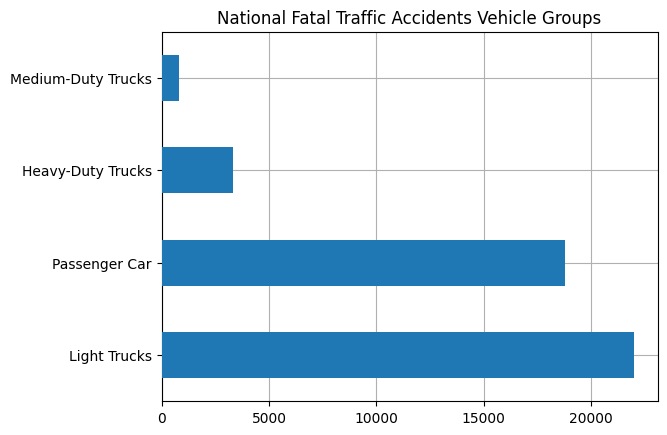

In [29]:
ax = farsVehVpicMergeDf["VehicleGroup"].value_counts().rename(vehicleGroupCat).plot.barh(title="National Fatal Traffic Accidents Vehicle Groups",zorder=3)
ax.grid(zorder=0)
farsVehVpicMergeDf["VehicleGroup"].value_counts().rename(vehicleGroupCat)

Light Trucks          529
Passenger Car         489
Heavy-Duty Trucks      80
Medium-Duty Trucks     17
Name: VehicleGroup, dtype: int64

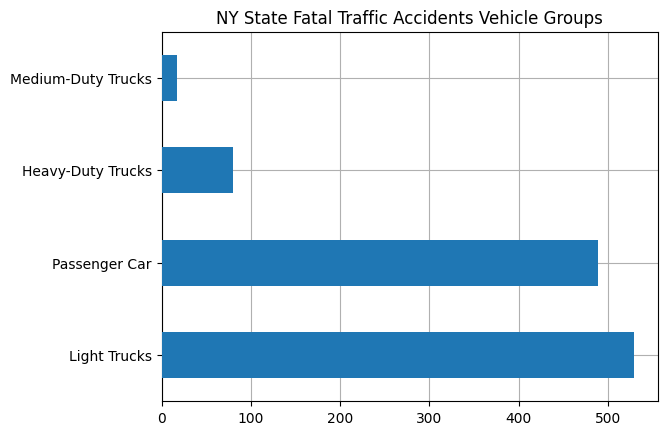

In [30]:
ax = farsVehVpicMergeDf[farsVehVpicMergeDf["STATE"]==36]["VehicleGroup"].value_counts().rename(vehicleGroupCat).plot.barh(title="NY State Fatal Traffic Accidents Vehicle Groups",zorder=3)
ax.grid(zorder=0)
farsVehVpicMergeDf[farsVehVpicMergeDf["STATE"]==36]["VehicleGroup"].value_counts().rename(vehicleGroupCat)

Light Trucks          6641135
Passenger Car         3576399
Medium-Duty Trucks     133028
Heavy-Duty Trucks      126918
Unknown                 56028
Large Trucks                2
Name: VehicleGroup, dtype: int64

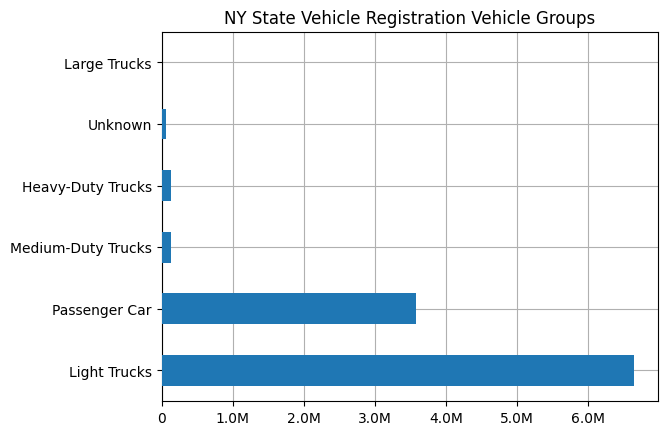

In [31]:
ax = nydmvVinDecodeDf["VehicleGroup"].value_counts().rename(vehicleGroupCat).plot.barh(title="NY State Vehicle Registration Vehicle Groups",zorder=3)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions))
ax.grid(zorder=0)
nydmvVinDecodeDf["VehicleGroup"].value_counts().rename(vehicleGroupCat)

In [32]:
unknownGroupQty = (nydmvVinDecodeDf["VehicleGroup"]==99).sum()
print("NYSDMS vehicles witthout grouping = ",unknownGroupQty,"(",unknownGroupQty/nydmvNumVehicles*100,"%)")

NYSDMS vehicles witthout grouping =  56028 ( 0.5319024712560201 %)


In [33]:
print("Body Types for Vehicles with Unknown Groups")
print(nydmvVinDecodeDf[nydmvVinDecodeDf["VehicleGroup"]==99]["Body Type"].value_counts())
print()

Body Types for Vehicles with Unknown Groups
ATV     11183
P/SH     9032
MCY      5607
TRLR     5286
RBM      3363
        ...  
POLE        0
AMBU        0
DCOM        0
RPLC        0
LOCO        0
Name: Body Type, Length: 57, dtype: int64



Vehicles in Unknown Group Type failed VIN API query (invalid VIN)

Remove some unknown types

Body Code | Body Style Description
--- | ---
MCY | MOTORCYCLE
ATV | ALL TERRAIN VEHICLE
P/SH | POWER SHOVEL
TRLR | TRAILER
RBM | ROAD BUILDING MACHINE
LTRL | LIGHT TRAILER
TRAC | TRACTOR
RD/S | ROAD SWEEPER
H/WH | HOUSE ON WHEELS
BUS | BUS(OMNIBUS)
MOPD | MOPED
T/CR | TRACTOR CRANE
FIRE | FIRE TRUCK
EMVR | EARTH MOVER
S/SP | SAND OR AGRICULTRAL SPREADER/SPRAYER
LSV | LOW SPEED VEHICLE
W/DR | WELL DRILLER
LSVT | LOW SPEED VEHICLE - TRUCK
W/SR | WELL SERVICING RIG
H/TR | HOUSE TRAILER
REFG | REFRIGERATOR TRAILER
FPM | FEED PROCESSING MACHINE
MCC | MOBILE CAR CRUSHER


In [34]:
# remove some of the non-applicable unknown types

nydmvIndRemoveIdx = nydmvVinDecodeDf[(nydmvVinDecodeDf["VehicleGroup"]==99) & 
    nydmvVinDecodeDf["Body Type"].isin(["MCY","ATV","P/SH","TRLR","RBM","LTRL","TRAC","RD/S","H/WH","BUS","MOPD","T/CR","FIRE","EMVR","S/SP","LSV","W/DR","LSVT","W/SR","H/TR","REFG","FPM","MCC"]
        )].index

print("Total to remove: ",len(nydmvIndRemoveIdx))


Total to remove:  42214


In [35]:
# remove selected body tyopes
nydmvVinDecodeDf.drop(index=nydmvIndRemoveIdx,inplace=True)

In [36]:
print("Body Types for Vehicles with Unknown Groups")
print(nydmvVinDecodeDf[nydmvVinDecodeDf["VehicleGroup"]==99]["Body Type"].value_counts())
print()
unknownGroupQty = (nydmvVinDecodeDf["VehicleGroup"]==99).sum()
print("NYSDMS vehicles witthout grouping = ",unknownGroupQty,"(",unknownGroupQty/nydmvNumVehicles*100,"%)")

Body Types for Vehicles with Unknown Groups
SUBN    3058
2DSD    2566
4DSD    1909
CONV    1318
SEMI     684
        ... 
MCC        0
MCY        0
P/SH       0
POLE       0
W/SR       0
Name: Body Type, Length: 57, dtype: int64

NYSDMS vehicles witthout grouping =  13814 ( 0.13114337006372995 %)


In [37]:
print("Body Types for Vehicles with Unknown Groups")
print(nydmvVinDecodeDf[nydmvVinDecodeDf["VehicleGroup"]==99]["Body Type"].value_counts())
print()

Body Types for Vehicles with Unknown Groups
SUBN    3058
2DSD    2566
4DSD    1909
CONV    1318
SEMI     684
        ... 
MCC        0
MCY        0
P/SH       0
POLE       0
W/SR       0
Name: Body Type, Length: 57, dtype: int64



In [38]:
unknownGroupQty = (nydmvVinDecodeDf["VehicleGroup"]==99).sum()
print("NYSDMS vehicles witthout grouping = ",unknownGroupQty,"(",unknownGroupQty/nydmvNumVehicles*100,"%)")
nydmvVinDecodeDf["VehicleGroup"].value_counts().rename(vehicleGroupCat)

NYSDMS vehicles witthout grouping =  13814 ( 0.13114337006372995 %)


Light Trucks          6641135
Passenger Car         3576399
Medium-Duty Trucks     133028
Heavy-Duty Trucks      126918
Unknown                 13814
Large Trucks                2
Name: VehicleGroup, dtype: int64

In [39]:
print("Unknown passenger veh          = ",len(nydmvVinDecodeDf[(nydmvVinDecodeDf["VehicleGroup"]==99) & nydmvVinDecodeDf["Body Type"].isin(["2DSD","4DSD","CONV","SEDN"])]))
print("Unknown passenger light trucks = ",len(nydmvVinDecodeDf[(nydmvVinDecodeDf["VehicleGroup"]==99) & nydmvVinDecodeDf["Body Type"].isin(["UTIL","SUBN","VAN"])]))

Unknown passenger veh          =  5846
Unknown passenger light trucks =  3952


Given that the unknown vehciles without VIN decode would fall under either Passenger Car or Large Truck, and they're < 0.13% of registrations they will be removed

In [40]:
# remove unknown vehicle groups and 
nydmvVinDecodeDf = nydmvVinDecodeDf[~nydmvVinDecodeDf["VehicleGroup"].isin([99,6])]

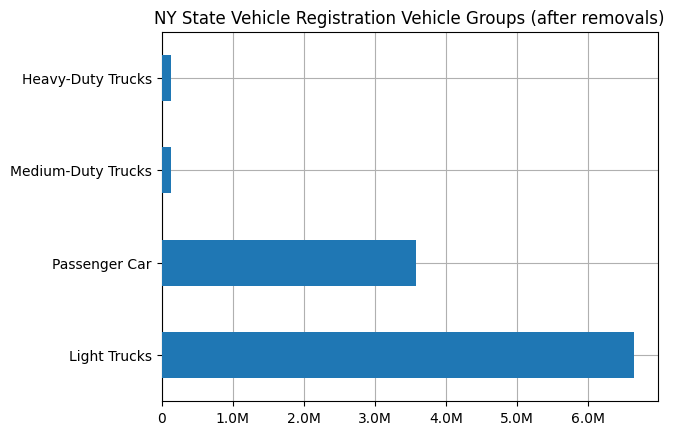

In [41]:
ax = nydmvVinDecodeDf["VehicleGroup"].value_counts().rename(vehicleGroupCat).plot.barh(title="NY State Vehicle Registration Vehicle Groups (after removals)",zorder=3)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions))
ax.grid(zorder=0)

## Update Safety Feature Indicators

Present safety Features as Boolean Columns (True/False) as follows:

| Original Feature Name | Boolean Feature Name | True Mapping[^1] 
| --- | --- | --- |
AdaptiveCruiseControlId | AdaptiveCruiseControl | 1:'Standard'
AdaptiveDrivingBeamId | AdaptiveDrivingBeam | 1:'Standard'
AntilockBrakeSystemId | AntilockBrakeSystem | 1:'Standard'
AutoPedestrianAlertingSoundId | AutoPedestrianAlertingSound | 1:'Standard'
BackupCameraId | BackupCamera |  1:'Standard'
BlindSpotInterventionId | BlindSpotIntervention | 1:'Standard'
BlindSpotWarningId | BlindSpotWarning | 1:'Standard'
CrashImminentBrakingID | CrashImminentBraking | 1:'Standard'
DaytimeRunningLightId | DaytimeRunningLight | 1:'Standard'
DynamicBrakeSupportId | DynamicBrakeSupport | 1:'Standard'
ElectronicStabilityControlId | ElectronicStabilityControl | 1:'Standard'
ForwardCollisionWarningId | ForwardCollisionWarning | 1:'Standard'
LaneCenteringAssistanceId | LaneCenteringAssistance | 1:'Standard'
LaneDepartureWarningId | LaneDepartureWarning |  1:'Standard'
LaneKeepingAssistanceId | LaneKeepingAssistance | 1:'Standard'
ParkAssistId | ParkAssist |  1:'Standard'
PedestrianAutoEmergencyBrakingId | PedestrianAutoEmergencyBraking | 1:'Standard'
RearAutomaticEmergencyBrakingId | RearAutomaticEmergencyBraking |  1:'Standard'
RearCrossTrafficAlertId | RearCrossTrafficAlert |  1:'Standard'
SemiAutoHeadlampBeamSwitchingId | SemiAutoHeadlampBeamSwitching | 1:'Standard'
TPMSId | TPMS | 1:'Direct', 2:'Indirect'
TractionControlId | TractionControl |  1:'Standard'

[^1]: Features marked as optional are assumed not present, NA are taken to mean feature not present

In [42]:
safetyColMap = {
    'AntilockBrakeSystemId' : 'AntilockBrakeSystem',
    'AdaptiveCruiseControlId' : 'AdaptiveCruiseControl',
    'AdaptiveDrivingBeamId' : 'AdaptiveDrivingBeam',
    'AutoPedestrianAlertingSoundId' : 'AutoPedestrianAlertingSound',
    'BlindSpotInterventionId' : 'BlindSpotIntervention',
    'BlindSpotWarningId' : 'BlindSpotWarning',
    'CrashImminentBrakingID' : 'CrashImminentBraking',
    'DaytimeRunningLightId' : 'DaytimeRunningLight',
    'DynamicBrakeSupportId' : 'DynamicBrakeSupport',
    'ElectronicStabilityControlId' : 'ElectronicStabilityControl',
    'ForwardCollisionWarningId' : 'ForwardCollisionWarning',
    'LaneCenteringAssistanceId' : 'LaneCenteringAssistance',
    'LaneDepartureWarningId' : 'LaneDepartureWarning',
    'LaneKeepingAssistanceId' : 'LaneKeepingAssistance',
    'ParkAssistId' : 'ParkAssist',
    'PedestrianAutoEmergencyBrakingId' : 'PedestrianAutoEmergencyBraking',
    'RearAutomaticEmergencyBrakingId' : 'RearAutomaticEmergencyBraking',
    'RearCrossTrafficAlertId' : 'RearCrossTrafficAlert',
    'SemiAutoHeadlampBeamSwitchingId' : 'SemiAutoHeadlampBeamSwitching',
    'TPMSId' : 'TPMS',
    'TractionControlId' : 'TractionControl',
}

def mapSafetyMostToFlag(x):
    if x == 1:
        return True
    return False

def mapSafetyTPMSToFlag(x):
    if x==1 or x==2:
        return True
    return False


In [43]:
# update Safety Features for Fars
for col in safetyColMap.keys():
    # new column name
    newCol = safetyColMap[col]
    if col == "TPMSId":
        farsVehVpicMergeDf[newCol] = farsVehVpicMergeDf[col].map(mapSafetyTPMSToFlag)
    else:
        farsVehVpicMergeDf[newCol] = farsVehVpicMergeDf[col].map(mapSafetyMostToFlag)

farsVehVpicMergeDf.drop(columns=safetyColMap.keys(),inplace=True)

farsVehVpicMergeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44922 entries, 0 to 51434
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ST_CASE                         44922 non-null  int64  
 1   VEH_NO                          44922 non-null  int64  
 2   NUMOCCS                         44922 non-null  int64  
 3   MAKE                            44922 non-null  int64  
 4   MAK_MOD                         44922 non-null  int64  
 5   BODY_TYP                        44922 non-null  int64  
 6   MOD_YEAR                        44922 non-null  int64  
 7   VIN                             44922 non-null  object 
 8   TOW_VEH                         44922 non-null  int64  
 9   TRAV_SP                         44922 non-null  int64  
 10  ROLLOVER                        44922 non-null  int64  
 11  IMPACT1                         44922 non-null  int64  
 12  M_HARM                          

In [44]:
farsVehVpicMergeDf[safetyColMap.values()].sum()

AntilockBrakeSystem                6399
AdaptiveCruiseControl              1061
AdaptiveDrivingBeam                1098
AutoPedestrianAlertingSound         179
BlindSpotIntervention                 0
BlindSpotWarning                   1154
CrashImminentBraking               1647
DaytimeRunningLight                4345
DynamicBrakeSupport                4858
ElectronicStabilityControl         5311
ForwardCollisionWarning            1699
LaneCenteringAssistance               5
LaneDepartureWarning               1420
LaneKeepingAssistance              1244
ParkAssist                          191
PedestrianAutoEmergencyBraking      968
RearAutomaticEmergencyBraking         0
RearCrossTrafficAlert               135
SemiAutoHeadlampBeamSwitching      4511
TPMS                              19521
TractionControl                    5096
dtype: int64

In [45]:
# update Safety Features for Fars
for col in safetyColMap.keys():
    # new column name
    newCol = safetyColMap[col]
    if col == "TPMSId":
        nydmvVinDecodeDf[newCol] = nydmvVinDecodeDf[col].map(mapSafetyTPMSToFlag)
    else:
        nydmvVinDecodeDf[newCol] = nydmvVinDecodeDf[col].map(mapSafetyMostToFlag)

nydmvVinDecodeDf.drop(columns=safetyColMap.keys(),inplace=True)

nydmvVinDecodeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10477480 entries, 7306 to 12396967
Data columns (total 57 columns):
 #   Column                          Non-Null Count     Dtype         
---  ------                          --------------     -----         
 0   VIN                             10477480 non-null  object        
 1   Registration Class              10477480 non-null  category      
 2   City                            10477480 non-null  object        
 3   State                           10477480 non-null  category      
 4   Zip                             10477480 non-null  category      
 5   County                          10477480 non-null  object        
 6   Model Year                      10477480 non-null  Int64         
 7   Make                            10477480 non-null  category      
 8   Body Type                       10477480 non-null  category      
 9   Fuel Type                       10477480 non-null  category      
 10  Unladen Weight           

In [46]:
nydmvVinDecodeDf[safetyColMap.values()].sum()

AntilockBrakeSystem               3966841
AdaptiveCruiseControl             1372224
AdaptiveDrivingBeam                897612
AutoPedestrianAlertingSound        190366
BlindSpotIntervention              110699
BlindSpotWarning                  1581518
CrashImminentBraking              1742612
DaytimeRunningLight               3410742
DynamicBrakeSupport               3040208
ElectronicStabilityControl        3672551
ForwardCollisionWarning           2081613
LaneCenteringAssistance            337621
LaneDepartureWarning              1893497
LaneKeepingAssistance             1658239
ParkAssist                         317136
PedestrianAutoEmergencyBraking    1209819
RearAutomaticEmergencyBraking      122882
RearCrossTrafficAlert              733509
SemiAutoHeadlampBeamSwitching     3307500
TPMS                              7803187
TractionControl                   3544278
dtype: int64

## Merge FARS Vehicle and Accident Tables

In [47]:
# merge fars accident with fars vehicle

farsAccVehMerge = pd.merge(farsAccidentDf,farsVehVpicMergeDf.drop(columns="STATE"), on="ST_CASE", how="right",validate="one_to_many")
farsAccVehMerge = pd.merge(farsAccVehMerge,farsPersonDf,on=["ST_CASE","VEH_NO"],how="left")
farsAccVehMerge.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44922 entries, 0 to 44921
Columns: 101 entries, STATE to AGE
dtypes: bool(23), float64(11), int64(60), object(7)
memory usage: 28.1+ MB


In [48]:
# accidents that involve vehicles of interest are kept
print(len(farsAccidentDf),len(farsAccVehMerge["ST_CASE"].unique()), len(farsVehVpicMergeDf),len(farsAccVehMerge[["VEH_NO","ST_CASE"]].drop_duplicates()))

34119 31186 44922 44922


## Tag Vehicles in FARS as per induced exposure model

Following Induced Exposure Model Approach from [1]: *"...the set of comparison crashes was defined to be all multivehicle crashes where the focus vehicle was impacted from the rear or to either side. Risk was assessed to be the odds of all other crash types (frontal impact multivehicle crashes or single-vehicle crashes) compared to the comparison crashes."* and similarly in [2] "the vehicles/drivers involved in ... crashes can be split into striking group and struck group respectively. This analysis method is based on Quasi-induced exposure concept. Here, the striking vehicles/drivers can be considered as the at-fault ones and the struck vehicles/drivers are not-at-fault ones."

The IMPACT1 variable indicates where impact ocurred

![IMPACT1](FARS-AREAOFIMPACT.jpg)

Front = 1,11,12

[1] Michael D. Keall & Stuart Newstead (2016) Development of a method to rate the primary safety of vehicles using linked New Zealand crash and vehicle licensing data, Traffic Injury Prevention, 17:2, 151-158, DOI: 10.1080/15389588.2015.1045064

[2] Xuedong Yan & Essam Radwan (2006) Analyses of Rear-End Crashes Based on Classification Tree Models, Traffic Injury Prevention, 7:3, 276-282, DOI: 10.1080/15389580600660062

In [49]:
farsAccVehMerge["IMPACT1"].value_counts().sort_index().rename(farsCategories["IMPACT1"])

Non-Collision                             1910
1 Clock Point                             1784
2 Clock Point                              554
3 Clock Point                             1626
4 Clock Point                              309
5 Clock Point                              381
6 Clock Point                             2884
7 Clock Point                              459
8 Clock Point                              343
9 Clock Point                             1909
10 Clock Point                             636
11 Clock Point                            1949
12 Clock Point                           25203
Top                                        115
Undercarriage                              458
Cargo/Vehicle Parts Set-In-Motion           21
Other Objects or Person Set-In-Motion       15
Left                                       718
Left-Front Side                            581
Left-Back Side                             239
Right                                      566
Right-Front S

In [50]:
# Find comparison crashes (i.e. vehicle not at fault) 
print("Multivehicle Crashes                  =",(farsAccVehMerge["VE_TOTAL"] > 1).sum())
print("Vehicles impacted to the side or rear =",(~farsAccVehMerge["IMPACT1"].isin([1,12,11])).sum())
print("Comparison crashes                    =",((farsAccVehMerge["VE_TOTAL"] > 1) & ~farsAccVehMerge["IMPACT1"].isin([1,11,12])).sum())

Multivehicle Crashes                  = 29065
Vehicles impacted to the side or rear = 15986
Comparison crashes                    = 10803


In [51]:
# remove unknown and not reported
print("Removing ",farsAccVehMerge["IMPACT1"].isin([98,99]).sum()," records ")
farsAccVehMerge = farsAccVehMerge[~farsAccVehMerge["IMPACT1"].isin([98,99])]

Removing  1582  records 


In [52]:
# Find comparison crashes (i.e. vehicle not at fault) 
print("Multivehicle Crashes                  =",(farsAccVehMerge["VE_TOTAL"] > 1).sum())
print("Vehicles impacted to the side or rear =",(~farsAccVehMerge["IMPACT1"].isin([1,12,11])).sum())
print("Comparison crashes                    =",((farsAccVehMerge["VE_TOTAL"] > 1) & ~farsAccVehMerge["IMPACT1"].isin([1,11,12])).sum())

Multivehicle Crashes                  = 28585
Vehicles impacted to the side or rear = 14404
Comparison crashes                    = 10323


In [53]:
# Mark vehicles as Fault = False, for comparison crashes (exposure)
# Mark vehicles as Fault = True, for where vehicle is potentially the cause of the accident
farsAccVehMerge["Fault"] = ~((farsAccVehMerge["VE_TOTAL"] > 1) & ~farsAccVehMerge["IMPACT1"].isin([1,11,12]))
# check fault tag counts
farsAccVehMerge["Fault"].value_counts()

True     33017
False    10323
Name: Fault, dtype: int64

Note see below, not able to differentiate between the 2 vehicles in teh crash so Fault will be remain as is for muti-fault crashes as it indicates exposure for both vehicles wiht the availabel information

In [104]:
def combine_values_asstr(xval):
    s = ""
    for x in xval:
        s = s + str(x) + ","
    return s
# find number of accidents with double faults
farsFaultsPerAcc = farsAccVehMerge[["ST_CASE","Fault"]].groupby("ST_CASE").sum()
mutiFaultCases = farsFaultsPerAcc[farsFaultsPerAcc["Fault"] > 1].index.values
print("Accidents with mutilple Veh as Fault = ",len(mutiFaultCases))
farsAccVehMutilFault =  farsAccVehMerge[farsAccVehMerge["ST_CASE"].isin(mutiFaultCases)][["ST_CASE","M_HARM_SIMP"]].groupby("ST_CASE").agg(combine_values_asstr)
print(farsAccVehMutilFault.value_counts())

Accidents with mutilple Veh as Fault =  4845
M_HARM_SIMP   
5,5,              3273
5,5,5,             735
5,5,5,5,           171
12,12,              89
14,5,               50
                  ... 
5,5,3,5,5,5,5,       1
5,5,3,5,             1
14,6,6,              1
14,8,                1
9,9,                 1
Length: 126, dtype: int64


## Additional prep work on FARS Accident / FARS Vehicle / FARS VPICdecode

In [54]:
# check missing model id
farsAccVehMerge[farsAccVehMerge["ModelId"].isna()]

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,ROUTE,RUR_URB,FUNC_SYS,HARM_EV,MAN_COLL,LGT_COND,WEATHER,FATALS,HARM_EV_SIMP,VEH_NO,NUMOCCS,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,VIN,TOW_VEH,TRAV_SP,ROLLOVER,IMPACT1,M_HARM,DR_PRES,L_STATUS,L_TYPE,PREV_ACC,PREV_DWI,PREV_SPD,PREV_OTH,SPEEDREL,VSPD_LIM,VSURCOND,P_CRASH2,ACC_TYPE,DEATHS,DR_DRINK,VPICMAKE,VPICMODEL,VPICBODYCLASS,GVWR_FROM,GVWR_TO,M_HARM_SIMP,VehicleDescriptor,VINDecodeError,VehicleTypeId,ManufacturerFullNameId,MakeId,ModelId,ModelYear,Series,Trim,Series2,Trim2,BodyClassId,DoorsCount,GrossVehicleWeightRatingFromId,GrossVehicleWeightRatingToId,SeatsCount,EngineCylindersCount,BackupCameraId,HeadlampLightSourceId,AnySafetyFeature,GoodVPICDecode,VehicleGroup,AntilockBrakeSystem,AdaptiveCruiseControl,AdaptiveDrivingBeam,AutoPedestrianAlertingSound,BlindSpotIntervention,BlindSpotWarning,CrashImminentBraking,DaytimeRunningLight,DynamicBrakeSupport,ElectronicStabilityControl,ForwardCollisionWarning,LaneCenteringAssistance,LaneDepartureWarning,LaneKeepingAssistance,ParkAssist,PedestrianAutoEmergencyBraking,RearAutomaticEmergencyBraking,RearCrossTrafficAlert,SemiAutoHeadlampBeamSwitching,TPMS,TractionControl,SEX,AGE,Fault
15876,17,170857,2,2,0,0,3,3,0,25,9,2020,6,13,35,2,2,3,12,11,1,1,2,5,1,1,86,86898,63,1994,1M2AM32C7RM0,1,998,0,8,12,1,9,9,99,99,99,99,0,55,1,98,98,0,0,490,99999,11,18,18,5,1M2AM32C*RM******,0,10,1027,490,NaN,1994,NaN,RB688S,NaN,NaN,11.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,False,True,8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,69.0,False


In [55]:
# fix the one :-)
farsAccVehMerge.at[15876,"ModelId"] = farsAccVehMerge[(farsAccVehMerge["MakeId"] == 490) & (farsAccVehMerge["VehicleGroup"] == 8)]["ModelId"].value_counts().index[0]
farsAccVehMerge["ModelId"] = farsAccVehMerge["ModelId"].astype("int64")

In [56]:
# Missing age record
(farsAccVehMerge["AGE"] >= 998).sum()/len(farsAccVehMerge["AGE"])*100

0.6206737425011537

In [57]:
farsAccVehMerge[farsAccVehMerge["AGE"] < 998]["AGE"].describe()

count    42829.000000
mean        42.484835
std         18.233661
min          2.000000
25%         27.000000
50%         39.000000
75%         56.000000
max        102.000000
Name: AGE, dtype: float64

In [58]:
farsAccVehMerge["AGE"].isna().sum()

242

In [59]:
# impute age as median for 998, 999 (unknown, unfiled)
ageMedian = farsAccVehMerge[farsAccVehMerge["AGE"] < 998]["AGE"].median()
farsAccVehMerge["AGE"] = farsAccVehMerge["AGE"].replace([998,999],ageMedian).fillna(ageMedian).astype("int64")

In [60]:
# check out suspicious driver ages... leave or keep? will keep for now since we'll be using age group instead of actual age
farsAccVehMerge[farsAccVehMerge["AGE"] < 10]

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,ROUTE,RUR_URB,FUNC_SYS,HARM_EV,MAN_COLL,LGT_COND,WEATHER,FATALS,HARM_EV_SIMP,VEH_NO,NUMOCCS,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,VIN,TOW_VEH,TRAV_SP,ROLLOVER,IMPACT1,M_HARM,DR_PRES,L_STATUS,L_TYPE,PREV_ACC,PREV_DWI,PREV_SPD,PREV_OTH,SPEEDREL,VSPD_LIM,VSURCOND,P_CRASH2,ACC_TYPE,DEATHS,DR_DRINK,VPICMAKE,VPICMODEL,VPICBODYCLASS,GVWR_FROM,GVWR_TO,M_HARM_SIMP,VehicleDescriptor,VINDecodeError,VehicleTypeId,ManufacturerFullNameId,MakeId,ModelId,ModelYear,Series,Trim,Series2,Trim2,BodyClassId,DoorsCount,GrossVehicleWeightRatingFromId,GrossVehicleWeightRatingToId,SeatsCount,EngineCylindersCount,BackupCameraId,HeadlampLightSourceId,AnySafetyFeature,GoodVPICDecode,VehicleGroup,AntilockBrakeSystem,AdaptiveCruiseControl,AdaptiveDrivingBeam,AutoPedestrianAlertingSound,BlindSpotIntervention,BlindSpotWarning,CrashImminentBraking,DaytimeRunningLight,DynamicBrakeSupport,ElectronicStabilityControl,ForwardCollisionWarning,LaneCenteringAssistance,LaneDepartureWarning,LaneKeepingAssistance,ParkAssist,PedestrianAutoEmergencyBraking,RearAutomaticEmergencyBraking,RearCrossTrafficAlert,SemiAutoHeadlampBeamSwitching,TPMS,TractionControl,SEX,AGE,Fault
5013,6,61664,2,2,0,2,4,4,2,16,10,2020,6,19,35,6,1,4,8,0,2,1,1,12,2,2,20,20423,15,2014,1GNKRGKD6EJ1,0,0,0,3,12,0,7,6,998,998,998,998,8,55,1,98,98,0,0,467,1853,7,12,12,5,1GNKRGKD*EJ******,0,7,984,467,1853,2014,1LT,NaN,NaN,NaN,7.0,4.0,14.0,NaN,NaN,6.0,NaN,NaN,True,True,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,2.0,4,False
13476,13,130779,2,2,0,0,4,4,0,25,7,2020,7,12,0,3,2,7,12,6,1,1,2,5,1,3,41,41047,4,1998,JM1TA2215W14,0,998,0,3,12,1,6,1,0,0,0,0,0,40,1,17,87,2,0,473,5470,13,11,11,5,JM1TA221*W1******,0,2,1041,473,5470,1998,Sedan,NaN,NaN,NaN,13.0,4.0,NaN,NaN,NaN,6.0,NaN,NaN,False,True,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,4,False
19295,22,220221,1,1,0,2,1,1,2,16,5,2020,7,20,25,3,1,5,10,0,3,2,1,13,1,1,20,20401,14,1997,1GNCS18W5VK1,0,0,0,2,10,0,7,6,998,998,998,998,8,25,2,98,98,0,0,467,11502,7,11,11,13,1GNCS18W*VK******,0,7,984,467,11502,1997,1500 (1/2 ton),NaN,NaN,NaN,7.0,2.0,12.0,NaN,NaN,6.0,NaN,NaN,False,True,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,2,True
24228,29,290274,1,1,0,0,2,2,0,29,5,2020,6,16,20,4,1,5,58,0,1,1,2,10,1,2,18,18022,4,2007,2G4WC5821712,0,35,1,14,1,0,7,6,998,998,998,998,8,45,1,13,4,2,0,468,1821,13,11,11,14,2G4WC582*71******,0,2,984,468,1821,2007,CX,NaN,NaN,NaN,13.0,4.0,NaN,NaN,NaN,6.0,NaN,NaN,False,True,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,7,True
27959,36,360771,2,2,0,1,3,3,1,8,11,2020,1,18,55,3,2,2,8,0,2,10,1,12,1,2,37,37441,20,2012,5FNRL5H61CB0,0,0,0,11,12,0,7,6,998,998,998,998,8,55,1,53,98,0,0,474,1869,2,12,12,5,5FNRL5H6*CB******,0,7,988,474,1869,2012,EXL/EXL-NAVI/EXL-RES,NaN,Wagon body style,NaN,2.0,5.0,14.0,NaN,NaN,6.0,NaN,NaN,True,True,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,2.0,9,True
38260,48,480896,5,4,1,3,4,4,3,10,4,2020,6,1,36,1,2,1,12,6,3,10,2,5,4,2,13,13421,15,1998,5LMPU28L3WLJ,0,0,0,6,12,0,7,6,998,998,998,998,8,65,1,60,98,0,0,464,1814,7,12,12,5,5LMPU28L*WL******,0,7,976,464,1814,1998,Base,NaN,NaN,NaN,7.0,4.0,15.0,NaN,NaN,8.0,NaN,NaN,False,True,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,3,False
38611,48,481178,2,2,0,0,3,3,0,24,5,2020,1,4,58,1,2,1,12,1,2,10,2,5,1,2,24,24010,6,2008,5GZER23768J1,0,0,0,6,12,0,7,6,998,998,998,998,8,75,1,98,32,2,0,1056,4596,7,12,12,5,5GZER237*8J******,0,7,984,1056,4596,2008,1/2 ton,XR,NaN,NaN,7.0,4.0,14.0,NaN,NaN,6.0,NaN

In [61]:
# create age group ranges, and add a numeric variable representing this age to simplify correlation calculations
farsAccVehMerge["AGE_GRP"] = pd.cut(farsAccVehMerge["AGE"],[0,14,24,34,44,54,64,200],labels=["<15","15-24","25-34","35-44","45-54","55-64",">65"])
farsAccVehMerge["AGE_GRP_INT"] = pd.factorize(farsAccVehMerge["AGE_GRP"])[0]

In [62]:
farsAccVehMerge["SEX"].value_counts(dropna=False)/len(farsAccVehMerge)

1.0    0.709160
2.0    0.280572
NaN    0.005584
9.0    0.002700
8.0    0.001984
Name: SEX, dtype: float64

In [63]:
# inpute SEX to 9 -> Female, Nan and 8 -> Male to maintain 70:30 proportion
farsAccVehMerge["SEX"] = farsAccVehMerge["SEX"].replace(9,2).replace(8,1).fillna(1).astype("int64")

In [64]:
farsAccVehMerge["SEX"].value_counts(dropna=False)/len(farsAccVehMerge)

1    0.716728
2    0.283272
Name: SEX, dtype: float64

In [65]:
# add column indicating if the accident impacted pedestrians
farsAccVehMerge["Pedestrian"] = farsAccVehMerge["PEDS"] > 0
# add column indicating is the vehicle had any safey feature
farsAccVehMerge["AnySafetyFeature"] = farsAccVehMerge[safetyColMap.values()].apply(lambda row: sum(row) > 0,axis=1)

In [66]:
# set speed limit for cases missing it (speed limit = 98 and 99 means missing values)
print(farsAccVehMerge["VSPD_LIM"].value_counts(dropna=False).sort_index()/len(farsAccVehMerge))
wAvgSpd = farsAccVehMerge[farsAccVehMerge["VSPD_LIM"]<98]["VSPD_LIM"].sum()/(farsAccVehMerge["VSPD_LIM"]<98).sum()
print("Median speed limit = ",farsAccVehMerge[farsAccVehMerge["VSPD_LIM"]<98]["VSPD_LIM"].median())
farsAccVehMerge["VSPD_LIM"] = farsAccVehMerge["VSPD_LIM"].replace([98,99],round(wAvgSpd/5)*5)
print(farsAccVehMerge["VSPD_LIM"].value_counts(dropna=False).sort_index()/len(farsAccVehMerge))


0     0.008976
5     0.000300
10    0.000554
15    0.001477
20    0.002238
25    0.040863
30    0.044209
35    0.101292
40    0.070235
45    0.158006
50    0.046262
55    0.256461
60    0.039986
65    0.094762
70    0.072473
75    0.021551
80    0.002884
85    0.000046
98    0.033272
99    0.004153
Name: VSPD_LIM, dtype: float64
Median speed limit =  55.0
0     0.008976
5     0.000300
10    0.000554
15    0.001477
20    0.002238
25    0.040863
30    0.044209
35    0.101292
40    0.070235
45    0.158006
50    0.083687
55    0.256461
60    0.039986
65    0.094762
70    0.072473
75    0.021551
80    0.002884
85    0.000046
Name: VSPD_LIM, dtype: float64


Reduce number of Speed Limit classes, but creating 4 groups
* < 20 Km/h
* 20-40
* 40-60
* 60-80
* >= 80 

VSPD_HIGH flag:
* Speed < 75 Km/h = False
* Speed >= 75 Km/h = True

In [111]:
# create speed limit ranges, and add a numeric variable representing this age to simplify correlation calculations
farsAccVehMerge["VSPD_LIM_GRP"] = pd.cut(farsAccVehMerge["VSPD_LIM"],[0,20,40,60,80,200],labels=["<20","20-40","40-60","60-80",">80"],right=False)
farsAccVehMerge["VSPD_LIM_GRP_INT"] = pd.factorize(farsAccVehMerge["VSPD_LIM_GRP"])[0]
print(farsAccVehMerge["VSPD_LIM_GRP"].value_counts(dropna=False).sort_index()/len(farsAccVehMerge))

<20      0.011306
20-40    0.188602
40-60    0.568389
60-80    0.228772
>80      0.002930
Name: VSPD_LIM_GRP, dtype: float64


In [113]:
# Additional columns to keep
columns2Keep = ['STATE', 'ST_CASE', 'VEH_NO', 'RUR_URB', 'MAN_COLL', 'LGT_COND', 'WEATHER', 
       'IMPACT1', 'VSURCOND', 'ACC_TYPE', 'DR_DRINK', 
       'M_HARM_SIMP', 'VSPD_LIM_GRP', 'VSPD_LIM_GRP_INT', 'ModelId', 'ModelYear', 
       'VehicleGroup', 'AnySafetyFeature','SEX', 'AGE_GRP', 'AGE_GRP_INT', 'Pedestrian', 'Fault'] + list(safetyColMap.values())

In [114]:
farsAccVehMergeLight = farsAccVehMerge[columns2Keep].copy()
farsAccVehMergeLight.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43340 entries, 0 to 44921
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   STATE                           43340 non-null  int64   
 1   ST_CASE                         43340 non-null  int64   
 2   VEH_NO                          43340 non-null  int64   
 3   RUR_URB                         43340 non-null  int64   
 4   MAN_COLL                        43340 non-null  int64   
 5   LGT_COND                        43340 non-null  int64   
 6   WEATHER                         43340 non-null  int64   
 7   IMPACT1                         43340 non-null  int64   
 8   VSURCOND                        43340 non-null  int64   
 9   ACC_TYPE                        43340 non-null  int64   
 10  DR_DRINK                        43340 non-null  int64   
 11  M_HARM_SIMP                     43340 non-null  int64   
 12  VSPD_LIM_GRP      

In [115]:
# use this for most of the calculations
#farsAccVehMergeLighter = farsAccVehMergeLight.drop(columns=["STATE","ST_CASE","VEH_NO","HOUR","ModelId","ModelYear","AGE_GRP"]+list(safetyColMap.values()))
farsAccVehMergeLighter = farsAccVehMergeLight.drop(columns=["STATE","ST_CASE","VEH_NO","AGE_GRP"]+list(safetyColMap.values()))
corr1 = farsAccVehMergeLighter.corr(method = "spearman")
corr1

/var/folders/4d/pq_2_fgs7s3bjnxxpgksl2880000gn/T/ipykernel_1580/4062666336.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = farsAccVehMergeLighter.corr(method = "spearman")


,RUR_URB,MAN_COLL,LGT_COND,WEATHER,IMPACT1,VSURCOND,ACC_TYPE,DR_DRINK,M_HARM_SIMP,VSPD_LIM_GRP_INT,ModelId,ModelYear,VehicleGroup,AnySafetyFeature,SEX,AGE_GRP_INT,Pedestrian,Fault
RUR_URB,1.000000,0.008329,0.182210,-0.056220,0.048850,-0.053659,0.064301,-0.043692,0.052742,0.013210,-0.005648,0.088260,-0.132917,0.140862,0.032210,-0.040229,0.206809,-0.079426
MAN_COLL,0.008329,1.000000,-0.194828,-0.003215,0.006501,-0.010560,0.680737,-0.173009,-0.293188,-0.073936,0.015351,0.080776,0.037464,0.039299,0.049488,0.044138,-0.407740,-0.382164
LGT_COND,0.182210,-0.194828,1.000000,-0.008692,0.042208,0.036651,-0.136349,0.169070,0.121511,0.034108,-0.008008,0.006525,-0.102323,0.047261,-0.043062,-0.111916,0.212455,0.084195
WEATHER,-0.056220,-0.003215,-0.008692,1.000000,-0.025096,0.386457,-0.017756,-0.004825,-0.032986,0.016924,0.010476,-0.013711,0.013638,-0.019646,-0.005999,0.009980,-0.038424,0.019906
IMPACT1,0.048850,0.006501,0.042208,-0.025096,1.000000,-0.004003,0.006956,-0.006811,-0.051207,-0.040420,-0.014088,0.059538,-0.029231,0.059772,-0.016594,-0.004109,0.128642,0.263898
VSURCOND,-0.053659,-0.010560,0.036651,0.386457,-0.004003,1.000000,-0.028445,-0.003100,-0.029143,-0.048254,0.000901,-0.013264,0.007314,-0.025528,-0.019403,-0.008792,-0.027446,0.027484
ACC_TYPE,0.064301,0.680737,-0.136349,-0.017756,0.006956,-0.028445,1.000000,-0.232350,-0.151471,-0.020160,0.022031,0.124524,0.067343,0.068248,0.062959,0.057332,-0.194500,-0.364980
DR_DRINK,-0.043692,-0.173009,0.169070,-0.004825,-0.006811,-0.003100,-0.232350,1.000000,-0.008169,-0.020220,-0.028785,-0.100741,-0.092666,-0.037183,-0.066698,-0.081666,-0.110064,0.143551
M_HARM_SIMP,0.052742,-0.293188,0.121511,-0.032986,-0.051207,-0.029143,-0.151471,-0.008169,1.000000,0.073588,-0.009280,-0.031275,0.037182,-0.025279,0.003488,-0.015614,0.475558,0.116238
VSPD_LIM_GRP_INT,0.013210,-0.073936,0.034108,0.016924,-0.040420,-0.048254,-0.020160,-0.020220,0.073588,1.000000,0.028191,0.054331,0.061854,-0.008092,-0.018011,-0.002757,0.011781,-0.051364


<AxesSubplot: >

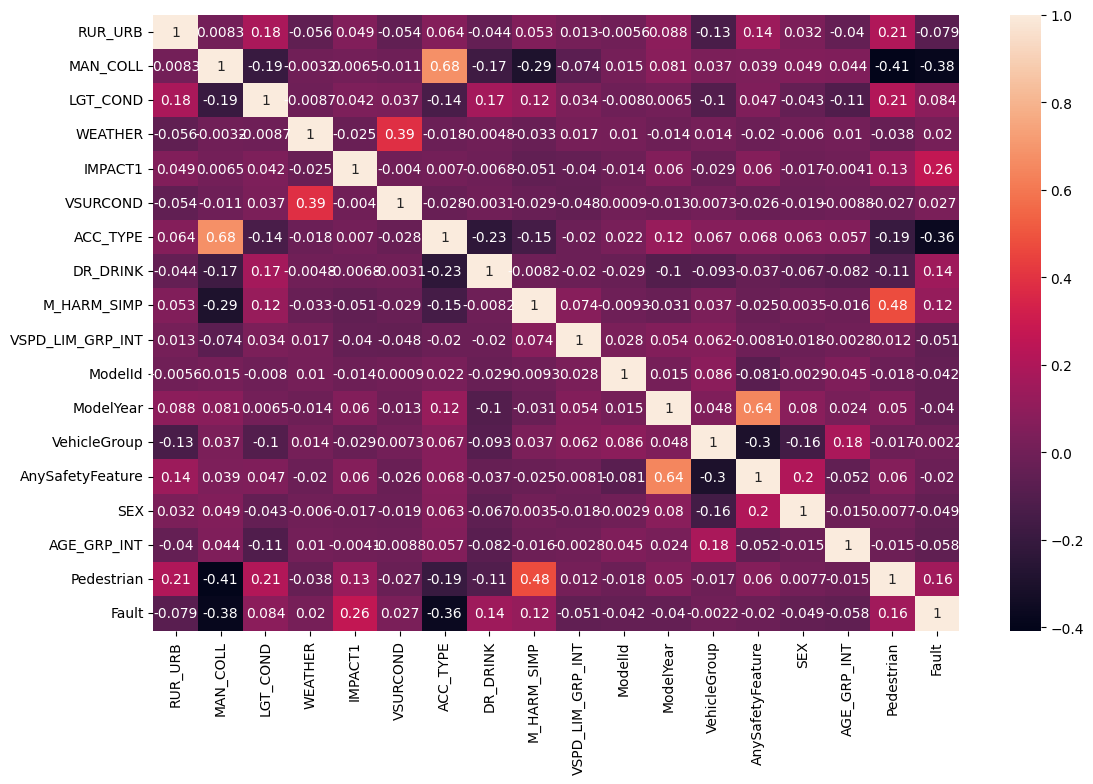

In [116]:
f, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(corr1, annot=True, ax=ax)

*Remove highly correlated parameters:*


ACC_TYPE and MAN_COLL corr ~ 0.68 -> keep MAN_COLL as it is simpler

other candidates:
Pedestrian and M_HARM_SIMP
VSURCOND and WEATHER

In [117]:
farsAccVehMergeLight = farsAccVehMergeLight.drop(columns=["ACC_TYPE"])

Cumulative sum =  [0.99991574 0.99996216 0.99998182 0.99999249 0.99999665 0.99999822
 0.99999918 0.99999948 0.99999969 0.99999978 0.99999984 0.99999989
 0.99999993 0.99999995 0.99999996 0.99999997 0.99999998 0.99999999
 0.99999999 0.99999999 0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


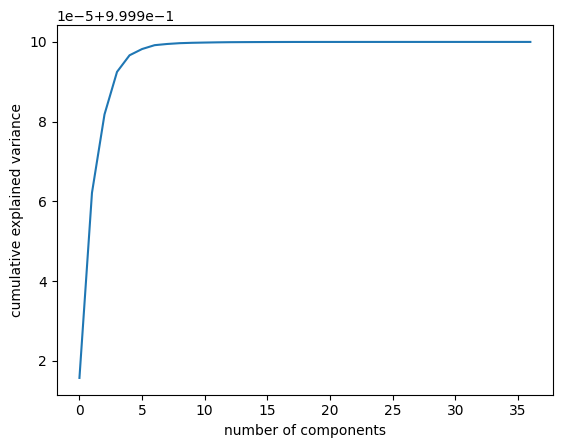

In [118]:
from sklearn.decomposition import PCA

pca = PCA().fit(farsAccVehMergeLight.drop(columns=["STATE","ST_CASE","VEH_NO","VSPD_LIM_GRP","AGE_GRP","Fault"]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print("Cumulative sum = ",np.cumsum(pca.explained_variance_ratio_))

## Prepare DataFrame with top 20 vehicle models only

In [120]:
farsAccVehMergeLightTopMod = farsAccVehMergeLight[farsAccVehMergeLight["ModelId"].isin(farsTopModels["ModelId"].values)]
farsAccVehMergeLightTopMod.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14690 entries, 2 to 44921
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   STATE                           14690 non-null  int64   
 1   ST_CASE                         14690 non-null  int64   
 2   VEH_NO                          14690 non-null  int64   
 3   RUR_URB                         14690 non-null  int64   
 4   MAN_COLL                        14690 non-null  int64   
 5   LGT_COND                        14690 non-null  int64   
 6   WEATHER                         14690 non-null  int64   
 7   IMPACT1                         14690 non-null  int64   
 8   VSURCOND                        14690 non-null  int64   
 9   DR_DRINK                        14690 non-null  int64   
 10  M_HARM_SIMP                     14690 non-null  int64   
 11  VSPD_LIM_GRP                    14690 non-null  category
 12  VSPD_LIM_GRP_INT  

## Prepare Train and Test data (All Vehicles)

In [121]:
from sklearn.model_selection import train_test_split

featuresToTrain = [
    # all features
    [
        'ModelId', 'ModelYear', 'VehicleGroup', 
        'SEX', 'AGE_GRP_INT', 'DR_DRINK',
        'RUR_URB', 'MAN_COLL', 'LGT_COND', 'WEATHER', 'IMPACT1', 'VSURCOND', 'M_HARM_SIMP','VSPD_LIM_GRP_INT','Pedestrian', # 'ACC_TYPE',
        #'AnySafetyFeature',
        'AntilockBrakeSystem', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam',
        'AutoPedestrianAlertingSound', 'BlindSpotIntervention',
        'BlindSpotWarning', 'CrashImminentBraking', 'DaytimeRunningLight',
        'DynamicBrakeSupport', 'ElectronicStabilityControl',
        'ForwardCollisionWarning', 'LaneCenteringAssistance',
        'LaneDepartureWarning', 'LaneKeepingAssistance', 'ParkAssist',
        'PedestrianAutoEmergencyBraking', 'RearAutomaticEmergencyBraking',
        'RearCrossTrafficAlert', 'SemiAutoHeadlampBeamSwitching', 'TPMS',
        'TractionControl'
    ],
    # removing vehicle model
    [
        'ModelYear', 'VehicleGroup', 
        'SEX', 'AGE_GRP_INT', 'DR_DRINK',
        'RUR_URB', 'MAN_COLL', 'LGT_COND', 'WEATHER', 'IMPACT1', 'VSURCOND', 'M_HARM_SIMP','VSPD_LIM_GRP_INT','Pedestrian', # 'ACC_TYPE',
        #'AnySafetyFeature',
        'AntilockBrakeSystem', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam',
        'AutoPedestrianAlertingSound', 'BlindSpotIntervention',
        'BlindSpotWarning', 'CrashImminentBraking', 'DaytimeRunningLight',
        'DynamicBrakeSupport', 'ElectronicStabilityControl',
        'ForwardCollisionWarning', 'LaneCenteringAssistance',
        'LaneDepartureWarning', 'LaneKeepingAssistance', 'ParkAssist',
        'PedestrianAutoEmergencyBraking', 'RearAutomaticEmergencyBraking',
        'RearCrossTrafficAlert', 'SemiAutoHeadlampBeamSwitching', 'TPMS',
        'TractionControl'
    ],
    # removing driver factors
    [
        'ModelId', 'ModelYear', 'VehicleGroup', 
        #'SEX', 'AGE_GRP_INT', 'DR_DRINK',
        'RUR_URB', 'MAN_COLL', 'LGT_COND', 'WEATHER', 'IMPACT1', 'VSURCOND', 'M_HARM_SIMP','VSPD_LIM_GRP_INT','Pedestrian', # 'ACC_TYPE',
        #'AnySafetyFeature',
        'AntilockBrakeSystem', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam',
        'AutoPedestrianAlertingSound', 'BlindSpotIntervention',
        'BlindSpotWarning', 'CrashImminentBraking', 'DaytimeRunningLight',
        'DynamicBrakeSupport', 'ElectronicStabilityControl',
        'ForwardCollisionWarning', 'LaneCenteringAssistance',
        'LaneDepartureWarning', 'LaneKeepingAssistance', 'ParkAssist',
        'PedestrianAutoEmergencyBraking', 'RearAutomaticEmergencyBraking',
        'RearCrossTrafficAlert', 'SemiAutoHeadlampBeamSwitching', 'TPMS',
        'TractionControl'
    ],
    # removing driver factors and detailed safety features
    [
        'ModelId', 'ModelYear', 'VehicleGroup', 
        #'SEX', 'AGE_GRP_INT', 'DR_DRINK',
        'RUR_URB', 'MAN_COLL', 'LGT_COND', 'WEATHER', 'IMPACT1', 'VSURCOND', 'M_HARM_SIMP','VSPD_LIM_GRP_INT','Pedestrian', # 'ACC_TYPE',
        'AnySafetyFeature',
        #'AntilockBrakeSystem', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam',
        #'AutoPedestrianAlertingSound', 'BlindSpotIntervention',
        #'BlindSpotWarning', 'CrashImminentBraking', 'DaytimeRunningLight',
        #'DynamicBrakeSupport', 'ElectronicStabilityControl',
        #'ForwardCollisionWarning', 'LaneCenteringAssistance',
        #'LaneDepartureWarning', 'LaneKeepingAssistance', 'ParkAssist',
        #'PedestrianAutoEmergencyBraking', 'RearAutomaticEmergencyBraking',
        #'RearCrossTrafficAlert', 'SemiAutoHeadlampBeamSwitching', 'TPMS',
        #'TractionControl'
    ],
    # removing driver factors and all  safety features
    [
        'ModelId', 'ModelYear', 'VehicleGroup', 
        #'SEX', 'AGE_GRP_INT', 'DR_DRINK',
        'RUR_URB', 'MAN_COLL', 'LGT_COND', 'WEATHER', 'IMPACT1', 'VSURCOND', 'M_HARM_SIMP','VSPD_LIM_GRP_INT','Pedestrian', # 'ACC_TYPE',
        #'AnySafetyFeature',
        #'AntilockBrakeSystem', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam',
        #'AutoPedestrianAlertingSound', 'BlindSpotIntervention',
        #'BlindSpotWarning', 'CrashImminentBraking', 'DaytimeRunningLight',
        #'DynamicBrakeSupport', 'ElectronicStabilityControl',
        #'ForwardCollisionWarning', 'LaneCenteringAssistance',
        #'LaneDepartureWarning', 'LaneKeepingAssistance', 'ParkAssist',
        #'PedestrianAutoEmergencyBraking', 'RearAutomaticEmergencyBraking',
        #'RearCrossTrafficAlert', 'SemiAutoHeadlampBeamSwitching', 'TPMS',
        #'TractionControl'
    ],
    # removing driver and accident factors
    [
        'ModelId', 'ModelYear', 'VehicleGroup', 
        #'SEX', 'AGE_GRP_INT', 'DR_DRINK',
        #'RUR_URB', 'MAN_COLL', 'LGT_COND', 'WEATHER', 'IMPACT1', 'VSURCOND', 'M_HARM_SIMP','VSPD_LIM_GRP_INT','Pedestrian', # 'ACC_TYPE',
        #'AnySafetyFeature',
        'AntilockBrakeSystem', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam',
        'AutoPedestrianAlertingSound', 'BlindSpotIntervention',
        'BlindSpotWarning', 'CrashImminentBraking', 'DaytimeRunningLight',
        'DynamicBrakeSupport', 'ElectronicStabilityControl',
        'ForwardCollisionWarning', 'LaneCenteringAssistance',
        'LaneDepartureWarning', 'LaneKeepingAssistance', 'ParkAssist',
        'PedestrianAutoEmergencyBraking', 'RearAutomaticEmergencyBraking',
        'RearCrossTrafficAlert', 'SemiAutoHeadlampBeamSwitching', 'TPMS',
        'TractionControl'
    ],
    # removing detailed safety features
    [
        'ModelId', 'ModelYear', 'VehicleGroup', 
        #'SEX', 'AGE_GRP_INT', 'DR_DRINK',
        #'RUR_URB', 'MAN_COLL', 'LGT_COND', 'WEATHER', 'IMPACT1', 'VSURCOND', 'M_HARM_SIMP','VSPD_LIM_GRP_INT','Pedestrian', # 'ACC_TYPE',
        'AnySafetyFeature',
        #'AntilockBrakeSystem', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam',
        #'AutoPedestrianAlertingSound', 'BlindSpotIntervention',
        #'BlindSpotWarning', 'CrashImminentBraking', 'DaytimeRunningLight',
        #'DynamicBrakeSupport', 'ElectronicStabilityControl',
        #'ForwardCollisionWarning', 'LaneCenteringAssistance',
        #'LaneDepartureWarning', 'LaneKeepingAssistance', 'ParkAssist',
        #'PedestrianAutoEmergencyBraking', 'RearAutomaticEmergencyBraking',
        #'RearCrossTrafficAlert', 'SemiAutoHeadlampBeamSwitching', 'TPMS',
        #'TractionControl'
    ],
    # ModelId, ModelYear only
    [
        'ModelId', 'ModelYear', # 'VehicleGroup', 
        #'SEX', 'AGE_GRP_INT', 'DR_DRINK',
        #'RUR_URB', 'MAN_COLL', 'LGT_COND', 'WEATHER', 'IMPACT1', 'VSURCOND', 'M_HARM_SIMP','VSPD_LIM_GRP_INT','Pedestrian', # 'ACC_TYPE',
        #'AnySafetyFeature',
        #'AntilockBrakeSystem', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam',
        #'AutoPedestrianAlertingSound', 'BlindSpotIntervention',
        #'BlindSpotWarning', 'CrashImminentBraking', 'DaytimeRunningLight',
        #'DynamicBrakeSupport', 'ElectronicStabilityControl',
        #'ForwardCollisionWarning', 'LaneCenteringAssistance',
        #'LaneDepartureWarning', 'LaneKeepingAssistance', 'ParkAssist',
        #'PedestrianAutoEmergencyBraking', 'RearAutomaticEmergencyBraking',
        #'RearCrossTrafficAlert', 'SemiAutoHeadlampBeamSwitching', 'TPMS',
        #'TractionControl'
    ],
]


In [122]:

X = []
y = farsAccVehMergeLighter["Fault"]
X_train = []
y_train = []
X_test = []
y_test = []
labelSet = []

for i in range(0,len(featuresToTrain)):
    X.append(None)
    #y.append(None)
    X_train.append(None)
    y_train.append(None)
    X_test.append(None)
    y_test.append(None)
    labelSet.append(None)
    X[i] = farsAccVehMergeLight[featuresToTrain[i]]
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X[i], y, test_size=0.3, random_state=100)
    labelSet[i] = "Feat "+str(i)+"-"+str(len(X[i].columns))+"cols"
    print(labelSet[i])
    print(i,":",X_train[i].columns.values)


Feat 0-36cols
0 : ['ModelId' 'ModelYear' 'VehicleGroup' 'SEX' 'AGE_GRP_INT' 'DR_DRINK'
 'RUR_URB' 'MAN_COLL' 'LGT_COND' 'WEATHER' 'IMPACT1' 'VSURCOND'
 'M_HARM_SIMP' 'VSPD_LIM_GRP_INT' 'Pedestrian' 'AntilockBrakeSystem'
 'AdaptiveCruiseControl' 'AdaptiveDrivingBeam'
 'AutoPedestrianAlertingSound' 'BlindSpotIntervention' 'BlindSpotWarning'
 'CrashImminentBraking' 'DaytimeRunningLight' 'DynamicBrakeSupport'
 'ElectronicStabilityControl' 'ForwardCollisionWarning'
 'LaneCenteringAssistance' 'LaneDepartureWarning' 'LaneKeepingAssistance'
 'ParkAssist' 'PedestrianAutoEmergencyBraking'
 'RearAutomaticEmergencyBraking' 'RearCrossTrafficAlert'
 'SemiAutoHeadlampBeamSwitching' 'TPMS' 'TractionControl']
Feat 1-35cols
1 : ['ModelYear' 'VehicleGroup' 'SEX' 'AGE_GRP_INT' 'DR_DRINK' 'RUR_URB'
 'MAN_COLL' 'LGT_COND' 'WEATHER' 'IMPACT1' 'VSURCOND' 'M_HARM_SIMP'
 'VSPD_LIM_GRP_INT' 'Pedestrian' 'AntilockBrakeSystem'
 'AdaptiveCruiseControl' 'AdaptiveDrivingBeam'
 'AutoPedestrianAlertingSound' 'BlindSpot

## Decision Tree

In [123]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

depth = []
optimum_depth = []
optimum_accurancy = []
clf = []
dt_y_pred = []
dt_confmat = []
dt_accuracy = np.zeros(len(featuresToTrain))
dt_precision = np.zeros((len(featuresToTrain),2))
dt_recall = np.zeros((len(featuresToTrain),2))
# Find the optimun DT depth for different Feature Sets
for fi in range(0,len(featuresToTrain)):
    depth.append(None)
    optimum_depth.append(None)
    optimum_accurancy.append(None)
    clf.append(None)
    dt_y_pred.append(None)
    dt_confmat.append(None)
    depth[fi] = []
    # find optimun tree length
    for i in range(3,20):
        clf[fi] = tree.DecisionTreeClassifier(criterion="entropy",max_depth=i)
        # Perform 7-fold cross validation 
        scores = cross_val_score(estimator=clf[fi], X=X[fi], y=y, cv=10, n_jobs=4)
        depth[fi].append((i,scores.mean()))
    depth[fi] = np.array(depth[fi])
    #print(depth[fi])

    optimum_depth[fi] = int(depth[fi][np.argmax(depth[fi][:,1],axis=0),0])
    optimum_accurancy[fi] = np.amax(depth[fi][:,1])
    # pre-set the DT to the optimum depth for later use
    clf[fi] = tree.DecisionTreeClassifier(criterion="entropy",max_depth=optimum_depth[fi])
    clf[fi] = clf[fi].fit(X_train[fi], y_train[fi])
    dt_y_pred[fi] = clf[fi].predict(X_test[fi])
    dt_confmat[fi]=confusion_matrix(y_test[fi], dt_y_pred[fi])
    dt_accuracy[fi]=accuracy_score(y_test[fi], dt_y_pred[fi])
    (dt_precision[fi], dt_recall[fi], _, _)=precision_recall_fscore_support(y_test[fi], dt_y_pred[fi],zero_division=0)
    print(fi,"Opt Depth = ",optimum_depth[fi],"(cross val avg accuracy =",optimum_accurancy[fi],", test accuracy =",dt_accuracy[fi],"presc",dt_precision[fi],"recall",dt_recall[fi])


0 Opt Depth =  9 (cross val avg accuracy = 0.9912090447623443 , test accuracy = 0.9916166743577911 presc [0.98951851 0.99226053] recall [0.97514526 0.99676898]
1 Opt Depth =  10 (cross val avg accuracy = 0.9915320719889247 , test accuracy = 0.9913090293800954 presc [0.98918387 0.99196061] recall [0.97417689 0.99666801]
2 Opt Depth =  9 (cross val avg accuracy = 0.9910706045223812 , test accuracy = 0.991693585602215 presc [0.98984273 0.99226131] recall [0.97514526 0.99686995]
3 Opt Depth =  9 (cross val avg accuracy = 0.991047531149054 , test accuracy = 0.9919243193354869 presc [0.99081666 0.99226364] recall [0.97514526 0.99717286]
4 Opt Depth =  9 (cross val avg accuracy = 0.991555145362252 , test accuracy = 0.9919243193354869 presc [0.99113883 0.99216474] recall [0.97482247 0.99727383]
5 Opt Depth =  3 (cross val avg accuracy = 0.7617904937701893 , test accuracy = 0.76172896477465 presc [0.         0.76172896] recall [0. 1.]
6 Opt Depth =  3 (cross val avg accuracy = 0.761790493770189

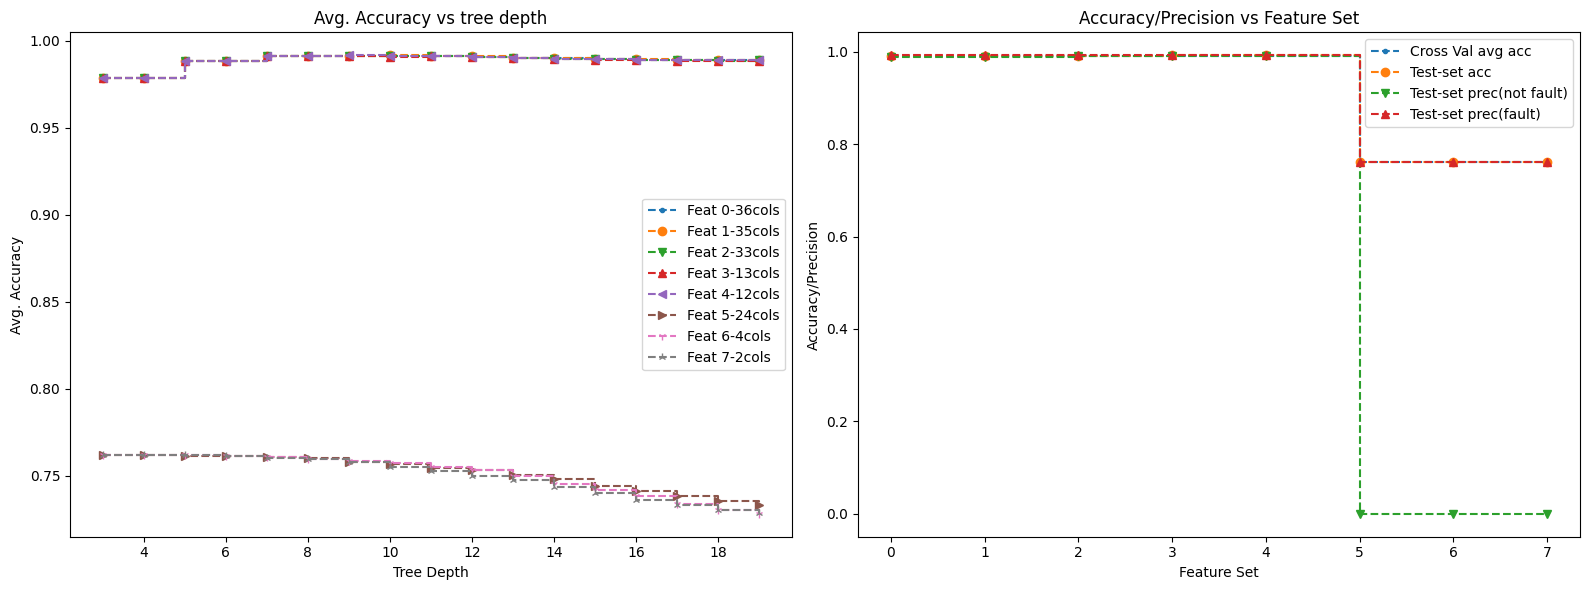

In [124]:
markers = [".","o","v","^","<",">","1","2","3","4","8"]

#fig, ax = plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ax[0].set_xlabel("Tree Depth")
ax[0].set_ylabel("Avg. Accuracy")
ax[0].set_title("Avg. Accuracy vs tree depth")
for fi in range(0,len(featuresToTrain)):
    ax[0].plot(depth[fi][:,0], depth[fi][:,1], linestyle = "--", marker=markers[fi], drawstyle="steps-post", label = labelSet[fi])  
ax[0].legend()

ax[1].set_xlabel("Feature Set")
ax[1].set_ylabel("Accuracy/Precision")
ax[1].set_title("Accuracy/Precision vs Feature Set")
ax[1].plot(range(0,len(featuresToTrain)), optimum_accurancy, linestyle = "--", marker=markers[0], drawstyle="steps-post", label = "Cross Val avg acc") 
ax[1].plot(range(0,len(featuresToTrain)), dt_accuracy, linestyle = "--", marker=markers[1], drawstyle="steps-post", label = "Test-set acc")  
ax[1].plot(range(0,len(featuresToTrain)), dt_precision[:,0], linestyle = "--", marker=markers[2], drawstyle="steps-post", label = "Test-set prec(not fault)")  
ax[1].plot(range(0,len(featuresToTrain)), dt_precision[:,1], linestyle = "--", marker=markers[3], drawstyle="steps-post", label = "Test-set prec(fault)")
ax[1].legend()

plt.tight_layout()

plt.show()

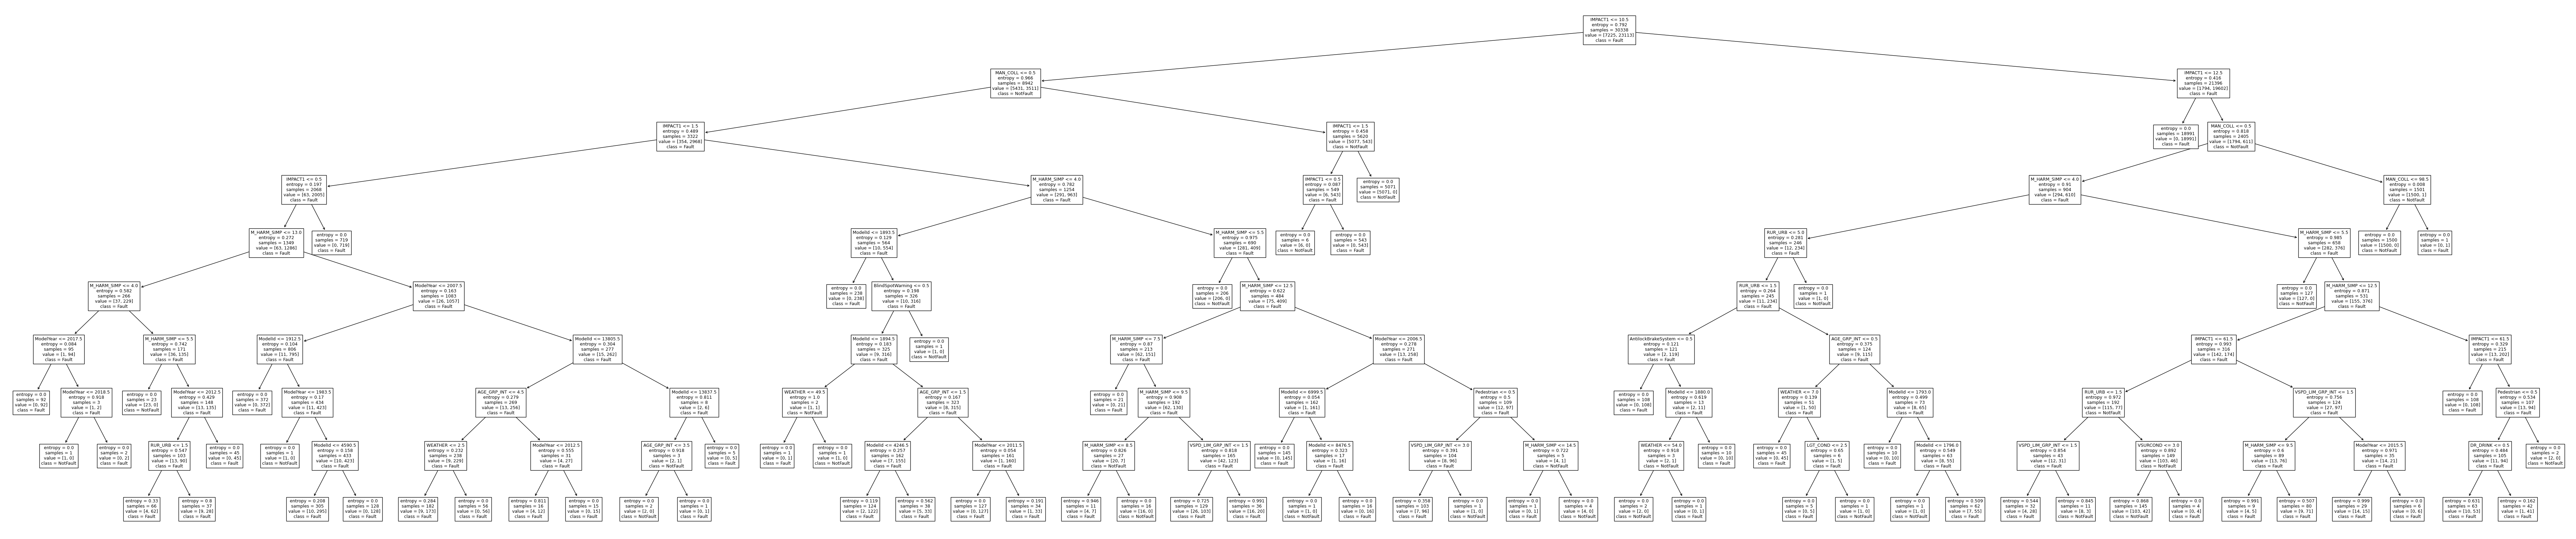

In [125]:
f, ax = plt.subplots(figsize=(96, 20))
_ = tree.plot_tree(clf[0],fontsize=9,feature_names=X[0].columns,class_names=["NotFault","Fault"],ax=ax)

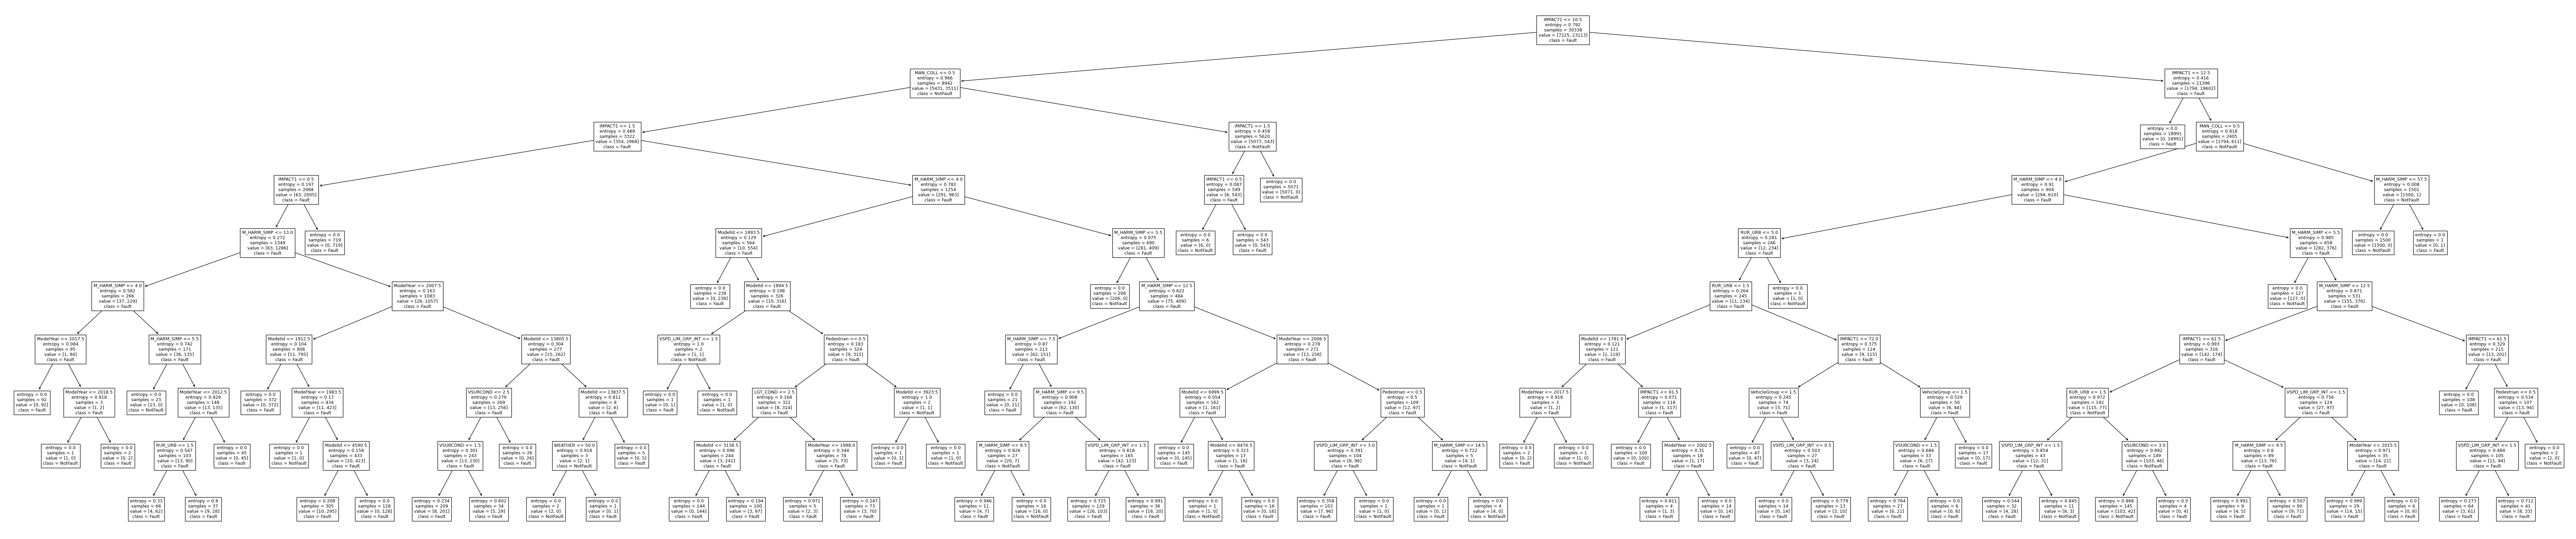

In [126]:
f, ax = plt.subplots(figsize=(96, 20))
_ = tree.plot_tree(clf[4],fontsize=9,feature_names=X[4].columns,class_names=["NotFault","Fault"],ax=ax)

## Logistic Regression Classificaiton

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

avg_accuracy = np.zeros(len(featuresToTrain))
pipe = []
lr_y_pred = []
lr_confmat = []
lr_accuracy = np.zeros(len(featuresToTrain))
lr_precision = np.zeros((len(featuresToTrain),2))
lr_recall = np.zeros((len(featuresToTrain),2))
for fi in range(0,len(featuresToTrain)):
    pipe.append(None)
    lr_y_pred.append(None)
    lr_confmat.append(None)
    pipe[fi] = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
    scores = cross_val_score(estimator=pipe[fi], X=X[fi], y=y, cv=10, n_jobs=4)
    avg_accuracy[fi] = scores.mean()

    pipe[fi] = pipe[fi].fit(X_train[fi], y_train[fi])
    lr_y_pred[fi] = pipe[fi].predict(X_test[fi])
    lr_confmat[fi]=confusion_matrix(y_test[fi], lr_y_pred[fi])
    lr_accuracy[fi]=accuracy_score(y_test[fi], lr_y_pred[fi])
    (lr_precision[fi], lr_recall[fi], _, _)=precision_recall_fscore_support(y_test[fi], lr_y_pred[fi],zero_division=0)
    print(fi,"Cross Val Avg accuracy =",avg_accuracy[fi],", test accuracy =",lr_accuracy[fi],"presc",lr_precision[fi],"recall",lr_recall[fi])


0 Cross Val Avg accuracy = 0.7933317951084449 , test accuracy = 0.7941855099215506 presc [0.68872987 0.80410636] recall [0.24854745 0.96486268]
1 Cross Val Avg accuracy = 0.7932856483617904 , test accuracy = 0.7938778649438548 presc [0.68761221 0.8038358 ] recall [0.24725629 0.96486268]
2 Cross Val Avg accuracy = 0.7973465620673743 , test accuracy = 0.7978003384094755 presc [0.72060207 0.80467376] recall [0.24725629 0.97001212]
3 Cross Val Avg accuracy = 0.7975311490539918 , test accuracy = 0.7988770958314105 presc [0.73021926 0.80490253] recall [0.24725629 0.97142569]
4 Cross Val Avg accuracy = 0.7978772496538994 , test accuracy = 0.7986463620981388 presc [0.73210832 0.80439505] recall [0.24435119 0.9720315 ]
5 Cross Val Avg accuracy = 0.7617674203968621 , test accuracy = 0.7615751422858021 presc [0.         0.76169231] recall [0.         0.99979806]
6 Cross Val Avg accuracy = 0.7618135671435164 , test accuracy = 0.76172896477465 presc [0.         0.76172896] recall [0. 1.]
7 Cross Va

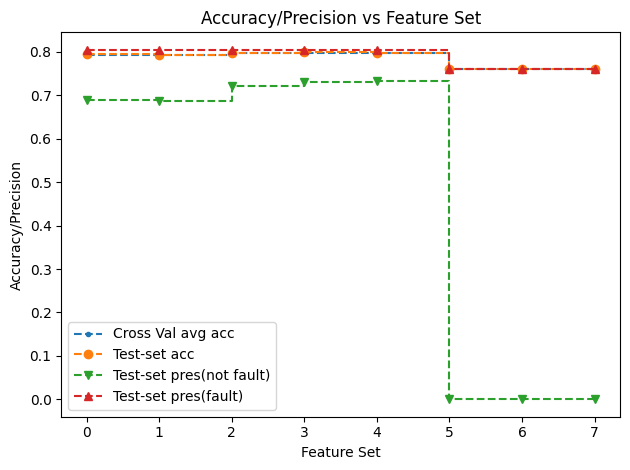

In [128]:
markers = [".","o","v","^","<",">","1","2","3","4","8"]

fig, ax = plt.subplots()
ax.set_xlabel("Feature Set")
ax.set_ylabel("Accuracy/Precision")
ax.set_title("Accuracy/Precision vs Feature Set")
ax.plot(range(0,len(featuresToTrain)), avg_accuracy, linestyle = "--", marker=markers[0], drawstyle="steps-post", label = "Cross Val avg acc")  
ax.plot(range(0,len(featuresToTrain)), lr_accuracy, linestyle = "--", marker=markers[1], drawstyle="steps-post", label = "Test-set acc")  
ax.plot(range(0,len(featuresToTrain)), lr_precision[:,0], linestyle = "--", marker=markers[2], drawstyle="steps-post", label = "Test-set pres(not fault)")  
ax.plot(range(0,len(featuresToTrain)), lr_precision[:,1], linestyle = "--", marker=markers[3], drawstyle="steps-post", label = "Test-set pres(fault)")
ax.legend()

plt.tight_layout()
plt.show()

## Prepare Train and Test data (Top Vehicles)

In [129]:
X = []
y = farsAccVehMergeLightTopMod["Fault"]
X_train = []
y_train = []
X_test = []
y_test = []
labelSet = []

for i in range(0,len(featuresToTrain)):
    X.append(None)
    #y.append(None)
    X_train.append(None)
    y_train.append(None)
    X_test.append(None)
    y_test.append(None)
    labelSet.append(None)
    X[i] = farsAccVehMergeLightTopMod[featuresToTrain[i]]
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X[i], y, test_size=0.3, random_state=100)
    labelSet[i] = "Feat "+str(i)+"-"+str(len(X[i].columns))+"cols"
    print(labelSet[i])
    print(i,":",X_train[i].columns.values)


Feat 0-36cols
0 : ['ModelId' 'ModelYear' 'VehicleGroup' 'SEX' 'AGE_GRP_INT' 'DR_DRINK'
 'RUR_URB' 'MAN_COLL' 'LGT_COND' 'WEATHER' 'IMPACT1' 'VSURCOND'
 'M_HARM_SIMP' 'VSPD_LIM_GRP_INT' 'Pedestrian' 'AntilockBrakeSystem'
 'AdaptiveCruiseControl' 'AdaptiveDrivingBeam'
 'AutoPedestrianAlertingSound' 'BlindSpotIntervention' 'BlindSpotWarning'
 'CrashImminentBraking' 'DaytimeRunningLight' 'DynamicBrakeSupport'
 'ElectronicStabilityControl' 'ForwardCollisionWarning'
 'LaneCenteringAssistance' 'LaneDepartureWarning' 'LaneKeepingAssistance'
 'ParkAssist' 'PedestrianAutoEmergencyBraking'
 'RearAutomaticEmergencyBraking' 'RearCrossTrafficAlert'
 'SemiAutoHeadlampBeamSwitching' 'TPMS' 'TractionControl']
Feat 1-35cols
1 : ['ModelYear' 'VehicleGroup' 'SEX' 'AGE_GRP_INT' 'DR_DRINK' 'RUR_URB'
 'MAN_COLL' 'LGT_COND' 'WEATHER' 'IMPACT1' 'VSURCOND' 'M_HARM_SIMP'
 'VSPD_LIM_GRP_INT' 'Pedestrian' 'AntilockBrakeSystem'
 'AdaptiveCruiseControl' 'AdaptiveDrivingBeam'
 'AutoPedestrianAlertingSound' 'BlindSpot

## Decision Tree (Top Vehicles)

In [130]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

depth = []
optimum_depth = []
optimum_accurancy = []
clf = []
dt_y_pred = []
dt_confmat = []
dt_accuracy = np.zeros(len(featuresToTrain))
dt_precision = np.zeros((len(featuresToTrain),2))
dt_recall = np.zeros((len(featuresToTrain),2))
# Find the optimun DT depth for different Feature Sets
for fi in range(0,len(featuresToTrain)):
    depth.append(None)
    optimum_depth.append(None)
    optimum_accurancy.append(None)
    clf.append(None)
    dt_y_pred.append(None)
    dt_confmat.append(None)
    depth[fi] = []
    # find optimun tree length
    for i in range(3,20):
        clf[fi] = tree.DecisionTreeClassifier(criterion="entropy",max_depth=i)
        # Perform 7-fold cross validation 
        scores = cross_val_score(estimator=clf[fi], X=X[fi], y=y, cv=10, n_jobs=4)
        depth[fi].append((i,scores.mean()))
    depth[fi] = np.array(depth[fi])
    #print(depth[fi])

    optimum_depth[fi] = int(depth[fi][np.argmax(depth[fi][:,1],axis=0),0])
    optimum_accurancy[fi] = np.amax(depth[fi][:,1])
    # pre-set the DT to the optimum depth for later use
    clf[fi] = tree.DecisionTreeClassifier(criterion="entropy",max_depth=optimum_depth[fi])
    clf[fi] = clf[fi].fit(X_train[fi], y_train[fi])
    dt_y_pred[fi] = clf[fi].predict(X_test[fi])
    dt_confmat[fi]=confusion_matrix(y_test[fi], dt_y_pred[fi])
    dt_accuracy[fi]=accuracy_score(y_test[fi], dt_y_pred[fi])
    (dt_precision[fi], dt_recall[fi], _, _)=precision_recall_fscore_support(y_test[fi], dt_y_pred[fi],zero_division=0)
    print(fi,"Opt Depth = ",optimum_depth[fi],"(cross val avg accuracy =",optimum_accurancy[fi],", test accuracy =",dt_accuracy[fi],"presc",dt_precision[fi],"recall",dt_recall[fi])


0 Opt Depth =  8 (cross val avg accuracy = 0.9910142954390742 , test accuracy = 0.9891082368958475 presc [0.98169557 0.9913921 ] recall [0.97232824 0.99434355]
1 Opt Depth =  8 (cross val avg accuracy = 0.9911504424778761 , test accuracy = 0.988881325164511 presc [0.98075072 0.99138955] recall [0.97232824 0.99404585]
2 Opt Depth =  8 (cross val avg accuracy = 0.9910142954390742 , test accuracy = 0.9891082368958475 presc [0.98169557 0.9913921 ] recall [0.97232824 0.99434355]
3 Opt Depth =  8 (cross val avg accuracy = 0.9909462219196732 , test accuracy = 0.988427501701838 presc [0.97794823 0.99167658] recall [0.97328244 0.99315272]
4 Opt Depth =  8 (cross val avg accuracy = 0.9908781484002722 , test accuracy = 0.9893351486271841 presc [0.98171319 0.99168646] recall [0.97328244 0.99434355]
5 Opt Depth =  3 (cross val avg accuracy = 0.7737236215112322 , test accuracy = 0.7621965055593374 presc [0.         0.76219651] recall [0. 1.]
6 Opt Depth =  3 (cross val avg accuracy = 0.7737236215112

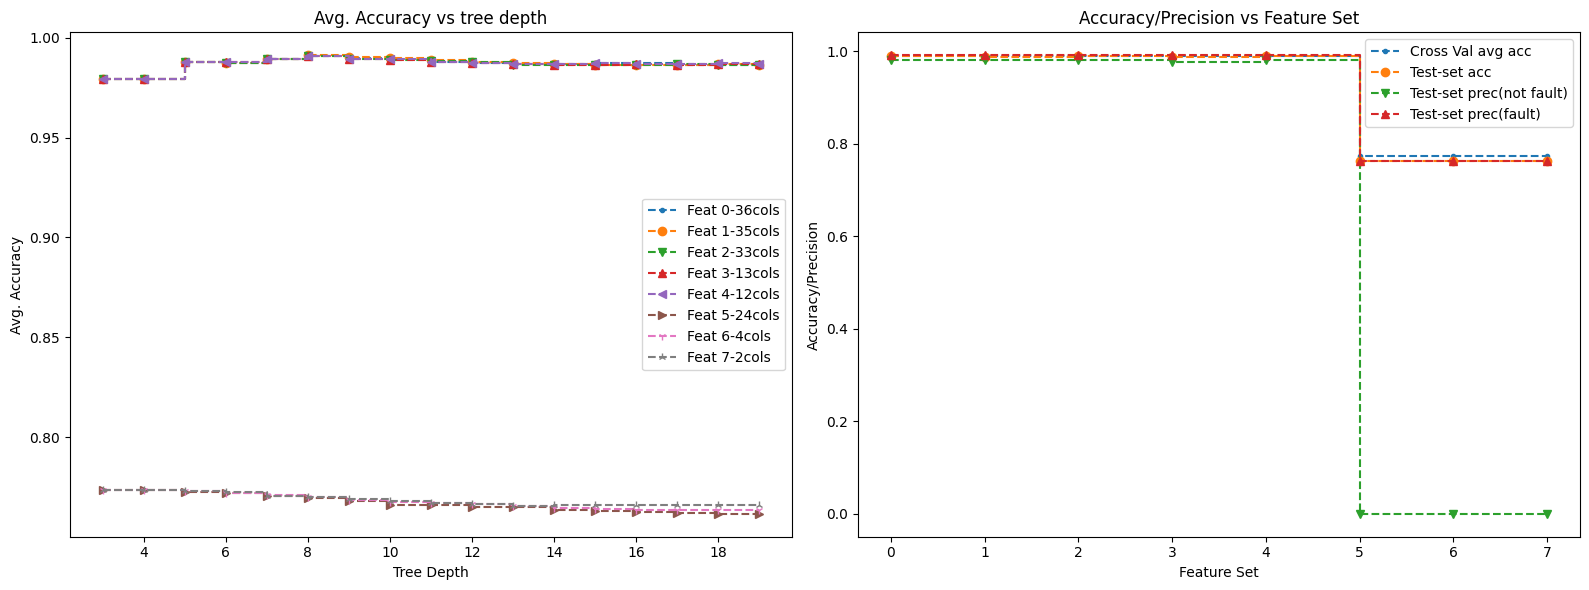

In [131]:
markers = [".","o","v","^","<",">","1","2","3","4","8"]

#fig, ax = plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ax[0].set_xlabel("Tree Depth")
ax[0].set_ylabel("Avg. Accuracy")
ax[0].set_title("Avg. Accuracy vs tree depth")
for fi in range(0,len(featuresToTrain)):
    ax[0].plot(depth[fi][:,0], depth[fi][:,1], linestyle = "--", marker=markers[fi], drawstyle="steps-post", label = labelSet[fi])  
ax[0].legend()

ax[1].set_xlabel("Feature Set")
ax[1].set_ylabel("Accuracy/Precision")
ax[1].set_title("Accuracy/Precision vs Feature Set")
ax[1].plot(range(0,len(featuresToTrain)), optimum_accurancy, linestyle = "--", marker=markers[0], drawstyle="steps-post", label = "Cross Val avg acc") 
ax[1].plot(range(0,len(featuresToTrain)), dt_accuracy, linestyle = "--", marker=markers[1], drawstyle="steps-post", label = "Test-set acc")  
ax[1].plot(range(0,len(featuresToTrain)), dt_precision[:,0], linestyle = "--", marker=markers[2], drawstyle="steps-post", label = "Test-set prec(not fault)")  
ax[1].plot(range(0,len(featuresToTrain)), dt_precision[:,1], linestyle = "--", marker=markers[3], drawstyle="steps-post", label = "Test-set prec(fault)")
ax[1].legend()

plt.tight_layout()

plt.show()

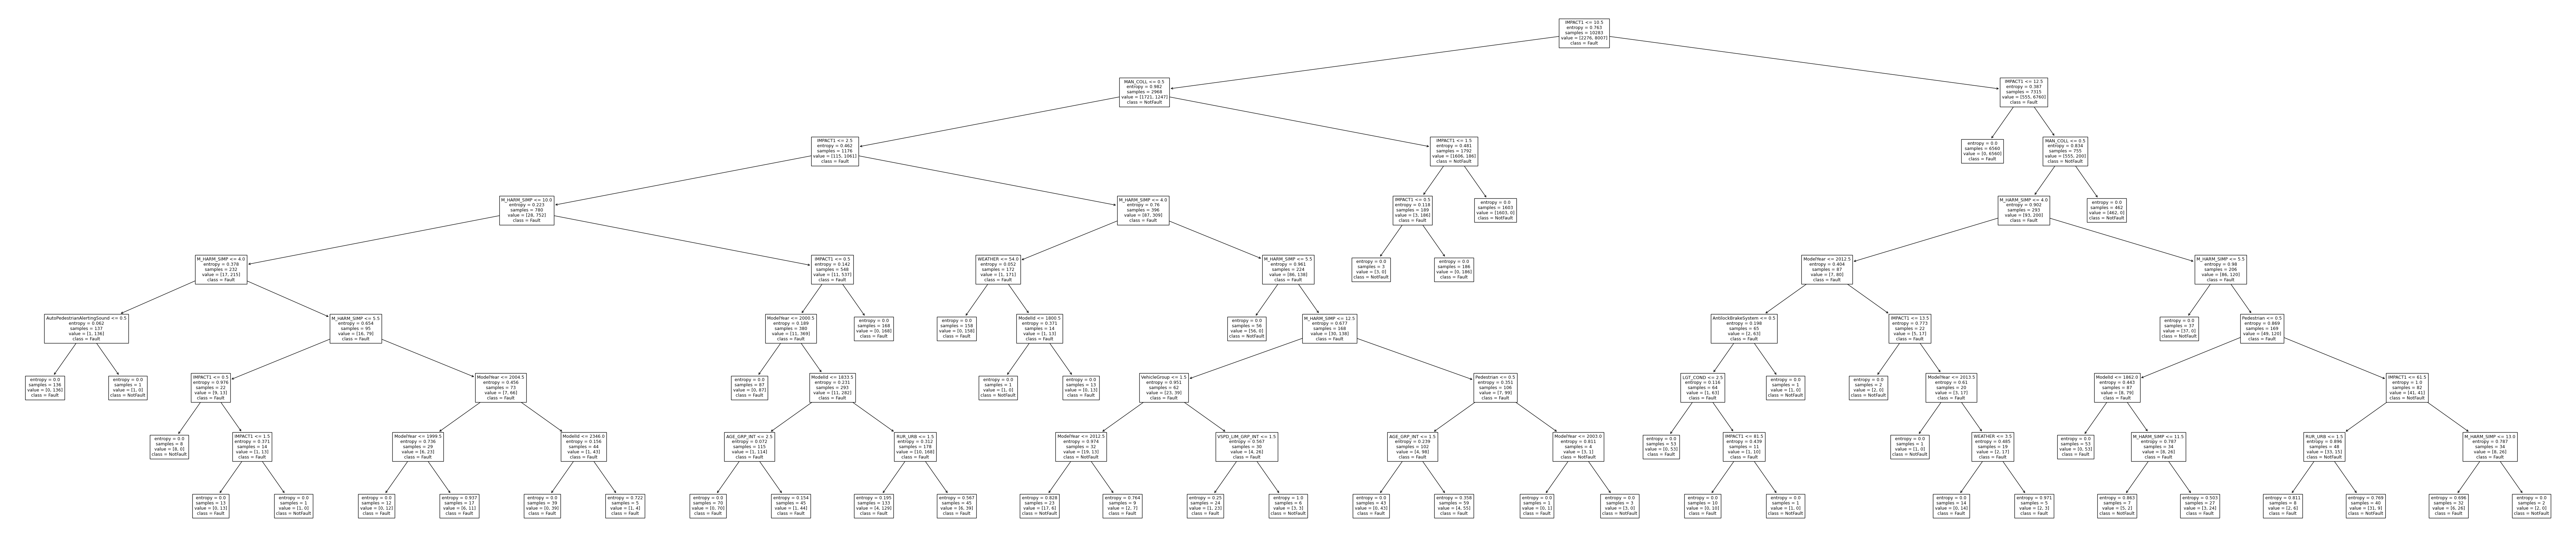

In [132]:
f, ax = plt.subplots(figsize=(96, 20))
_ = tree.plot_tree(clf[0],fontsize=9,feature_names=X[0].columns,class_names=["NotFault","Fault"],ax=ax)

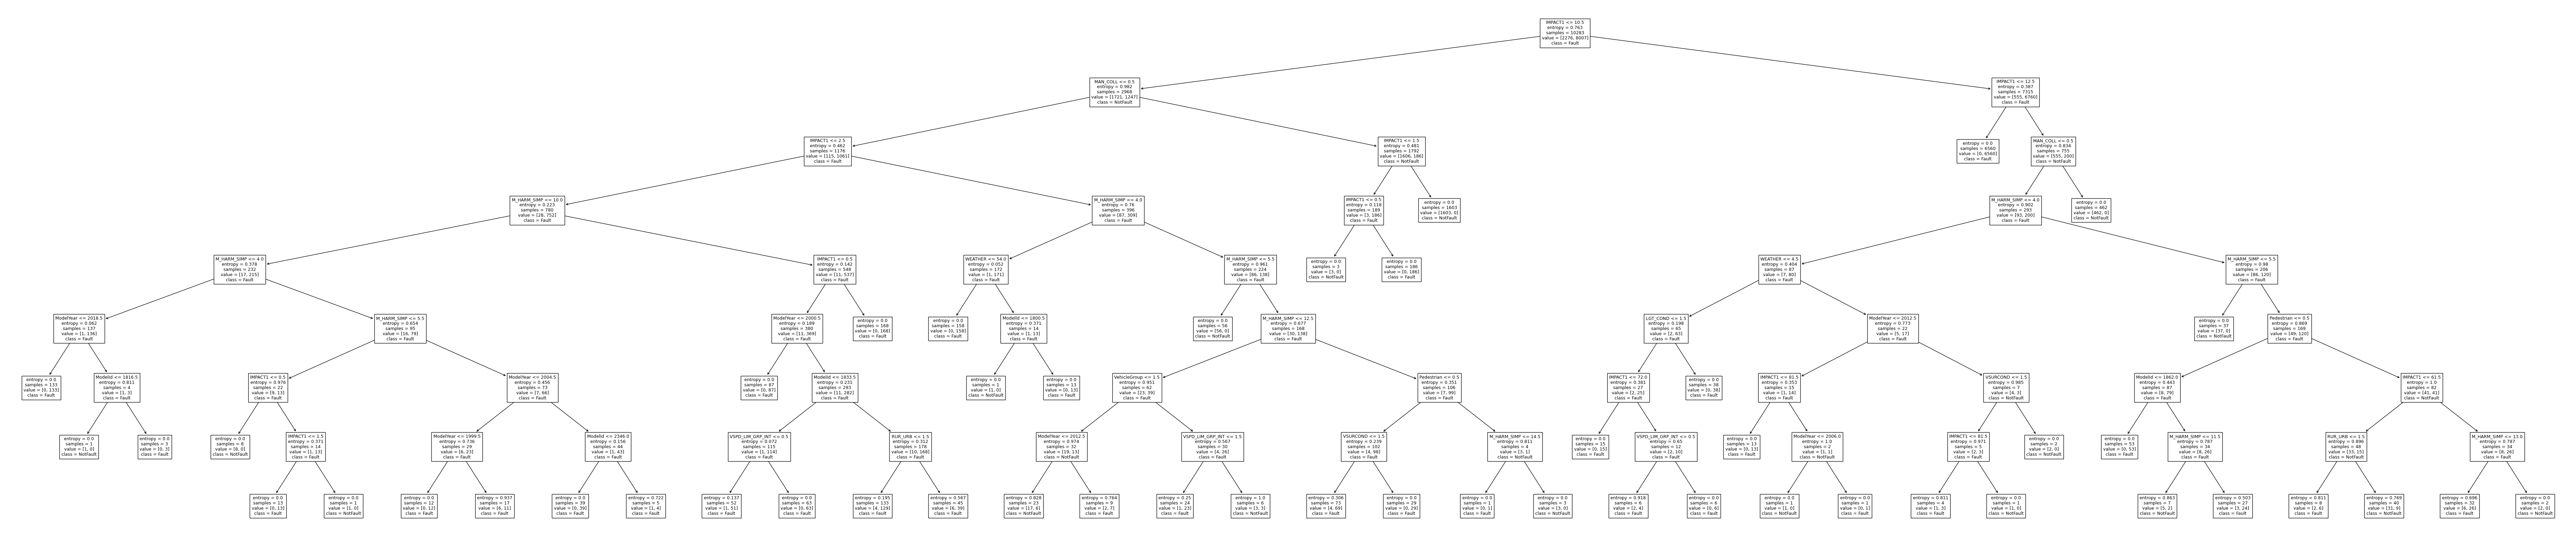

In [133]:
f, ax = plt.subplots(figsize=(96, 20))
_ = tree.plot_tree(clf[4],fontsize=9,feature_names=X[4].columns,class_names=["NotFault","Fault"],ax=ax)

## Logistic Regression Classificaiton (Top Vehicles)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

avg_accuracy = np.zeros(len(featuresToTrain))
pipe = []
lr_y_pred = []
lr_confmat = []
lr_accuracy = np.zeros(len(featuresToTrain))
lr_precision = np.zeros((len(featuresToTrain),2))
lr_recall = np.zeros((len(featuresToTrain),2))
for fi in range(0,len(featuresToTrain)):
    pipe.append(None)
    lr_y_pred.append(None)
    lr_confmat.append(None)
    pipe[fi] = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
    scores = cross_val_score(estimator=pipe[fi], X=X[fi], y=y, cv=10, n_jobs=4)
    avg_accuracy[fi] = scores.mean()

    pipe[fi] = pipe[fi].fit(X_train[fi], y_train[fi])
    lr_y_pred[fi] = pipe[fi].predict(X_test[fi])
    lr_confmat[fi]=confusion_matrix(y_test[fi], lr_y_pred[fi])
    lr_accuracy[fi]=accuracy_score(y_test[fi], lr_y_pred[fi])
    (lr_precision[fi], lr_recall[fi], _, _)=precision_recall_fscore_support(y_test[fi], lr_y_pred[fi],zero_division=0)
    print(fi,"Cross Val Avg accuracy =",avg_accuracy[fi],", test accuracy =",lr_accuracy[fi],"presc",lr_precision[fi],"recall",lr_recall[fi])


0 Cross Val Avg accuracy = 0.8051055139550716 , test accuracy = 0.8012253233492171 presc [0.7311828  0.80768278] recall [0.25954198 0.97022923]
1 Cross Val Avg accuracy = 0.8053097345132743 , test accuracy = 0.8003176764238711 presc [0.73076923 0.80657927] recall [0.25381679 0.97082465]
2 Cross Val Avg accuracy = 0.808713410483322 , test accuracy = 0.8053097345132744 presc [0.76536313 0.80884169] recall [0.26145038 0.97499256]
3 Cross Val Avg accuracy = 0.810211027910143 , test accuracy = 0.8080326752893124 presc [0.79190751 0.80940655] recall [0.26145038 0.97856505]
4 Cross Val Avg accuracy = 0.8113682777399591 , test accuracy = 0.807351940095303 presc [0.79351032 0.80850541] recall [0.25667939 0.97916046]
5 Cross Val Avg accuracy = 0.7737236215112322 , test accuracy = 0.7621965055593374 presc [0.         0.76219651] recall [0. 1.]
6 Cross Val Avg accuracy = 0.7737236215112322 , test accuracy = 0.7621965055593374 presc [0.         0.76219651] recall [0. 1.]
7 Cross Val Avg accuracy = 

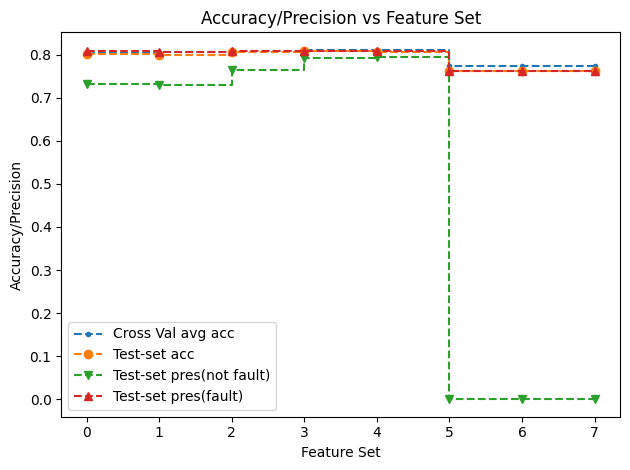

In [135]:
markers = [".","o","v","^","<",">","1","2","3","4","8"]

fig, ax = plt.subplots()
ax.set_xlabel("Feature Set")
ax.set_ylabel("Accuracy/Precision")
ax.set_title("Accuracy/Precision vs Feature Set")
ax.plot(range(0,len(featuresToTrain)), avg_accuracy, linestyle = "--", marker=markers[0], drawstyle="steps-post", label = "Cross Val avg acc")  
ax.plot(range(0,len(featuresToTrain)), lr_accuracy, linestyle = "--", marker=markers[1], drawstyle="steps-post", label = "Test-set acc")  
ax.plot(range(0,len(featuresToTrain)), lr_precision[:,0], linestyle = "--", marker=markers[2], drawstyle="steps-post", label = "Test-set pres(not fault)")  
ax.plot(range(0,len(featuresToTrain)), lr_precision[:,1], linestyle = "--", marker=markers[3], drawstyle="steps-post", label = "Test-set pres(fault)")
ax.legend()

plt.tight_layout()
plt.show()

## Induced Exposure Estimates (Top Vehicles)

Following approach from [1]
"...set of comparison crashes was defined to be all multivehicle crashes where the focus vehicle was impacted from the rear or to either side. Risk was assessed to be the odds of all other crash types (frontal impact multivehicle crashes or single-vehicle crashes) compared to the comparison crashes."

* Odds of Comparison Crashes for Vehicle = A = NotFault/(NotFault + Fault)
* Odds of Other Crash Types for Vehicle = B = Fault/(NotFault + Fault)
* Induced Exposure Risk = B/A = Fault/NotFault

[1] Michael D. Keall & Stuart Newstead (2016) Development of a method to rate the primary safety of vehicles using linked New Zealand crash and vehicle licensing data, Traffic Injury Prevention, 17:2, 151-158, DOI: 10.1080/15389588.2015.1045064

In [136]:
#farsModelGrp = farsAccVehMergeLightTopMod.groupby(["ModelId","Fault","AnySafetyFeature"]+list(safetyColMap.values()))
farsModelGrp = farsAccVehMergeLightTopMod.groupby(["ModelId","Fault"])
farsVehExp = farsModelGrp.count()["VEH_NO"].unstack()
farsVehExp["Risk"] = farsVehExp.iloc[:,1]/farsVehExp.iloc[:,0]
farsVehExp["Rate"] = farsVehExp.iloc[:,1]/(farsVehExp.iloc[:,0]+farsVehExp.iloc[:,1])
farsVehExp["Model"] = farsVehExp.index
farsVehExp["Model"] = farsVehExp["Model"].map(farsCategories["ModelId"])
farsVehExp.rename(farsCategories["ModelId"])
farsVehExp

Fault,False,True,Risk,Rate,Model
ModelId,,,,,
1779,106,334,3.150943,0.759091,Focus
1780,92,336,3.652174,0.785047,Fusion
1800,108,437,4.046296,0.801835,Explorer
1801,279,1245,4.462366,0.816929,F-150
1805,103,446,4.330097,0.812386,F-250
1833,118,448,3.796610,0.791519,Impala
1834,138,386,2.797101,0.736641,Malibu
1850,326,1448,4.441718,0.816234,Silverado
1852,76,402,5.289474,0.841004,Tahoe


In [137]:
# now include teh safety feature
#farsModelGrp = farsAccVehMergeLightTopMod.groupby(["ModelId","Fault","AnySafetyFeature"]+list(safetyColMap.values()))
farsModelGrp = farsAccVehMergeLight.groupby(["ModelId","Fault"])
farsVehExp1 = farsModelGrp.count()["VEH_NO"].unstack().dropna()
farsVehExp1 = farsVehExp1.rename(columns={True:"Fault",False:"NotFault"})
farsVehExp1["Total"] = farsVehExp1[["Fault","NotFault"]].sum(axis=1)
farsVehExp1["Risk"] = farsVehExp1["Fault"]/farsVehExp1["NotFault"]
farsVehExp1["Rate"] = farsVehExp1["Fault"]/(farsVehExp1["Total"])
farsVehExp1["Model"] = farsVehExp1.index
farsVehExp1["Model"] = farsVehExp1["Model"].map(farsCategories["ModelId"])

farsVehExp1.rename(farsCategories["ModelId"])
farsVehExp1.sort_values(by="Total",ascending=False).head(20)

Fault,NotFault,Fault,Total,Risk,Rate,Model
ModelId,,,,,,
1850,326.0,1448.0,1774.0,4.441718,0.816234,Silverado
1801,279.0,1245.0,1524.0,4.462366,0.816929,F-150
1861,278.0,835.0,1113.0,3.003597,0.750225,Accord
2469,270.0,715.0,985.0,2.648148,0.725888,Camry
1863,248.0,680.0,928.0,2.741935,0.732759,Civic
1904,216.0,589.0,805.0,2.726852,0.731677,Altima
1938,148.0,620.0,768.0,4.189189,0.807292,Ram
1857,134.0,603.0,737.0,4.500000,0.818182,Sierra
2208,201.0,503.0,704.0,2.502488,0.714489,Corolla


In [138]:
# now include teh safety feature
#farsModelGrp = farsAccVehMergeLightTopMod.groupby(["ModelId","Fault","AnySafetyFeature"]+list(safetyColMap.values()))
farsModelGrp = farsAccVehMergeLight.groupby(["ModelId","Fault"])
farsVehExp1 = farsModelGrp.count()["VEH_NO"].unstack().dropna()
farsVehExp1 = farsVehExp1.rename(columns={True:"Fault",False:"NotFault"})
farsVehExp1["Total"] = farsVehExp1[["Fault","NotFault"]].sum(axis=1)
farsVehExp1["Risk"] = farsVehExp1["Fault"]/farsVehExp1["NotFault"]
farsVehExp1["Rate"] = farsVehExp1["Fault"]/(farsVehExp1["Total"])
farsVehExp1["Model"] = farsVehExp1.index
farsVehExp1["Model"] = farsVehExp1["Model"].map(farsCategories["ModelId"])

farsVehExp1.rename(farsCategories["ModelId"])
farsVehExp1.sort_values(by="Risk",ascending=False).head(20)

Fault,NotFault,Fault,Total,Risk,Rate,Model
ModelId,,,,,,
11489,1.0,17.0,18.0,17.000000,0.944444,C/K Pickup
5885,1.0,16.0,17.0,16.000000,0.941176,GLC-Class
10291,1.0,14.0,15.0,14.000000,0.933333,Grand Vitara
4598,1.0,14.0,15.0,14.000000,0.933333,H2
2298,2.0,25.0,27.0,12.500000,0.925926,Veloster
25197,1.0,12.0,13.0,12.000000,0.923077,Wrangler JK
8988,1.0,12.0,13.0,12.000000,0.923077,Intrigue
3650,1.0,11.0,12.0,11.000000,0.916667,Echo
25754,2.0,22.0,24.0,11.000000,0.916667,300C


In [139]:
farsVehExp1.sort_values(by="Risk",ascending=False).tail(20)

Fault,NotFault,Fault,Total,Risk,Rate,Model
ModelId,,,,,,
6794,3.0,2.0,5.0,0.666667,0.400000,Mark
17213,3.0,2.0,5.0,0.666667,0.400000,C-HR
9718,3.0,2.0,5.0,0.666667,0.400000,377
2486,3.0,2.0,5.0,0.666667,0.400000,FLD132
3642,3.0,2.0,5.0,0.666667,0.400000,NQR/NRR
25756,5.0,3.0,8.0,0.600000,0.375000,Telluride
5192,7.0,4.0,11.0,0.571429,0.363636,Continental
1905,2.0,1.0,3.0,0.500000,0.333333,Leaf
2341,6.0,3.0,9.0,0.500000,0.333333,Cube
